# **Proyecto Final - Electiva IV (Machine Learning)**

## **Información del Proyecto**

- **Fecha:** 11/15/2025
- **Docente:** Robert Erick García 
- **Integrantes:** Karol Vanessa Vitonco y Sophie Rosero Muriel

<div id = "id0" >

## Tabla de Contenido

- [1. Pregunta del Análisis](#id1)
    - [1.1 Introducción](#id2)
    - [1.2 Datos](#id3)
    - [1.3 Objetivos](#id4)
    - [1.4 Variables Dependientes e Independientes](#id5)
- [2. Carga de Librerías](#id6)
- [3. Carga de Datos](#id7)
- [4. Descriptión y Limpieza](#id8)
    - [4.1 Información del dataset cargado](#id9)
    - [4.2 Ajustando los tipos de datos](#id10)
    - [4.3 Tratamiento de datos duplicados](#id11)
    - [4.4 Visualización de datos nulos](#id12)
    - [4.5 Eliminación de variables](#id13)
- [5. Análisis Exploratorio de Datos](#id15)
    - [5.1 Análisis Univariable](#id16)
        - [5.1.1 Análisis Descriptivo del Data Profiling](#id17)
        - [5.1.2 Variables Númericas](#id18)
        - [5.1.3 Variables Catagóricas](#id19)
    - [5.2 Análisis Bivariable](#id20)
        - [5.2.1 Númericas vs Variable Objetivo](#id21)
        - [5.2.2 Categoricas vs Variable Objetivo](#id22)
- [6. Conclusiones del EDA](#id23)
- [7. Procesamiento de Datos Final para Modelamiento](#id24)
    - [7.1 Tratamiento de datos nulos](#id25)
    - [7.2 Limpieza de datos atípicos](#id26)
    - [7.3 Codificación de variables categóricas](#id27)
    - [7.4 Ingeniería de características](#id28)
    - [7.5 Escalado/normalización de variables](#id29)
    - [7.6 Análisis de correlaciones](#id30)
    - [7.7 Balanceo de datos](#id31)
    - [7.8 Selección y justificación de variables finales](#id32)
- [8. Modelado / Comparación de Algoritmos](#id33)
    - [8.1 Descriptión General](#id34)
        - [8.1.1 Preparación de train/test](#id35)
        - [8.1.2 Información del dataset cargado](#id36)
        - [8.1.3 Visualización de variables](#id37)
    - [8.2 Random Forest Classifier](#id38)
        - [8.2.1 Evaluación del modelo](#id39)
    - [8.3 Logistic Regression](#id40)
        - [8.3.1 Evaluación del modelo](#id41)
    - [8.4 KNN Classifier](#id42)
        - [8.4.1 Evaluación del modelo](#id43)
- [9. Evaluación de Modelos](#id44)
    - [9.1 Métricas de Desempeño (MSE, RMSE, MAE, R²)](#id45)
    - [9.2 Tests de Significatividad Individual y Global](#id46)
- [10. Comparación y Conclusiones](#id47)

<div id = "id1" >

## **1. Pregunta del Análisis**

Este proyecto abarca un análisis exploratorio de datos (EDA), la preparación de datos (Data Preparation), el modelado y comparación de algoritmos, la evaluación de métricas de desempeño y la presentación de los resultados. El enfoque es identificar los factores que influyen en la **propensión a pagar la prima de renovación en políticas de seguros**, preparar el conjunto de datos para un sistema de aprendizaje automático que prediga esta propensión, y crear un plan de incentivos para agentes que maximice los ingresos netos (renovaciones menos incentivos). La pregunta rectora es: ***¿Qué factores influyen en la propensión a renovar primas de seguros, y cómo se puede preparar el dataset, modelar y evaluar para predecir esta probabilidad y optimizar incentivos?*** enfocado en identificar los factores que influyen en la **propensión a pagar la prima de renovación en políticas de seguros** y **preparar el conjunto de datos** para un sistema de aprendizaje automático que prediga esta propensión, permitiendo crear un plan de incentivos para agentes que maximice los ingresos netos.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id2" >

### **1.1 Introducción**

El dataset utilizado corresponde a datos de una compañía de seguros, enfocado en transacciones pasadas de asegurados y su propensión a renovar primas. Este dataset es proporcionado por el cliente (Robert Erick Gardía) como **insurance_company.csv** en el caso de estudio.

Contiene información demográfica (edad en días, ingresos mensuales, tipo de área de residencia), transaccional (porcentaje de prima pagada en efectivo o crédito, conteo de primas atrasadas en 3-6/6-12/más de 12 meses, puntuación de suscripción al solicitar, total de primas pagadas hasta ahora, canal de abastecimiento) y detalles de la póliza (monto de la prima mensual, renovación como variable objetivo binaria: 0 - No Renovado, 1 - Renovado). Adicionalmente se proporcionan relaciones clave: esfuerzo esperado en horas por agente según incentivos, e incremento esperado en probabilidades de renovación dado el esfuerzo del agente; estas se usarán en la sección de modelado y recomendaciones para optimizar incentivos.

El objetivo del análisis exploratorio es comprender las características fundamentales del conjunto de datos, identificar patrones en la renovación de primas, detectar anomalías (valores faltantes, atípicos) y preparar el dataset para modelamiento mediante limpieza, transformación, ingeniería de características y selección de variables. Esto permitirá responder preguntas clave, como:

- ¿Qué factores demográficos, transaccionales o de póliza influyen en la renovación?
- ¿Cuáles son los patrones de atrasos en pagos y canales de abastecimiento más comunes asociados con no renovaciones?
- ¿Cómo impactan los ingresos, edad y puntuación de suscripción en la propensión a renovar?
- ¿Qué variables deben eliminarse o transformarse para optimizar el modelo predictivo y el plan de incentivos?

[Regresar a la Tabla de Contenido](#id0)

<div id = "id3" >

### **1.2 Datos**

El conjunto de datos describe información de una compañía de seguros, incluyendo características demográficas, transaccionales, detalles de pagos atrasados, puntuación de suscripción, canal de abastecimiento, área de residencia, monto de prima y renovación. A continuación, se detallan las variables principales y la variable objetivo, con sus tipos de datos y descripciones corregidas y completadas según la información proporcionada.

**Identificadores**

- `id` → integer: Identificador único del cliente.

**Demográficas**

- `age_in_days` → integer: Edad del cliente en días.
- `Income` → integer: Ingresos mensuales del cliente.
- `residence_area_type` → string: Área de residencia del cliente. Valores: Urban, Rural.

**Transaccionales y Pagos**

- `perc_premium_paid_by_cash_credit` → float: Porcentaje del monto de la prima pagada en efectivo o con tarjeta de crédito.
- `Count_3-6_months_late` → integer: Número de primas atrasadas de 3 a 6 meses.
- `Count_6-12_months_late` → integer: Número de primas atrasadas de 6 a 12 meses.
- `Count_more_than_12_months_late` → integer: Número de primas atrasadas de más de 12 meses.
- `no_of_premiums_paid` → integer: Total de primas pagadas a tiempo hasta ahora.
- `premium` → integer: Monto de la prima del seguro mensual.

**Suscripción y Canal**

- `application_underwriting_score` → float: Puntuación de suscripción del solicitante en el momento de la solicitud.
- `sourcing_channel` → string: Canal de abastecimiento para la aplicación. Valores: A, B, C, D, E.

**Variable Objetivo**

- `renewal` → integer: Estado de renovación de la póliza. Valores:
    - 0: No Renovado.
    - 1: Renovado.

**Tipos de Datos**

- **Categóricos (string):** `sourcing_channel`, `residence_area_type`.
- **Numéricos (float):** `perc_premium_paid_by_cash_credit`, `application_underwriting_score`.
- **Numéricos (integer):** `id`, `age_in_days`, `Income`, `Count_3-6_months_late`, `Count_6-12_months_late`, `Count_more_than_12_months_late`, `no_of_premiums_paid`, `premium`, `renewal`.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id4" >

### **1.3 Objetivos**

El problema requiere anticipar si un cliente renovará su póliza en el siguiente periodo. Esto justifica un **enfoque principalmente predictivo,** ya que la compañía necesita identificar antes del vencimiento qué clientes presentan mayor riesgo de no renovación para dirigir incentivos y acciones de retención. El modelo estimará esta probabilidad utilizando las relaciones que serán identificadas en el EDA, apoyando la toma de decisiones estratégicas en el plan de incentivos.

En términos más generales, el proyecto se centrará en:

- **Comprensión del problema (Business Understanding):** Definir claramente el problema de negocio (predecir propensión a renovación para maximizar ingresos netos vía incentivos), objetivos del modelo predictivo (clasificación binaria de renovación), variables relevantes y justificación del enfoque predictivo para optimizar decisiones de agentes.

- **Análisis Exploratorio de Datos (EDA):** Realizar un análisis exhaustivo del dataset para identificar patrones, correlaciones y anomalías (valores faltantes, outliers) mediante visualizaciones claras, describir origen/estructura, limpieza inicial, codificación, y conclusiones intermedias, respondiendo: ¿Qué factores influyen en la propensión a renovar primas?

- **Preparación de los datos (Data Preparation):** Demostrar un proceso estructurado: ingeniería de variables, escalado/normalización, balanceo de clases, selección de características, y división train/test con validación cruzada.

- **Modelado y comparación de algoritmos:** Entrenar tres modelos distintos (Ridge, Lineal y KNN), comparar métricas (Accuracy, F1, ROC-AUC), optimizar con grid search/tuning, y seleccionar el más adecuado justificando su elección.

- **Evaluación y métricas de desempeño:** Calcular e interpretar métricas clave, explicar su impacto en el objetivo de negocio (maximizar renovaciones netas).
Comunicación ejecutiva de resultados: Resumir hallazgos, valor del modelo y recomendaciones (plan de incentivos) en sección clara/orientada a decisiones, con web-app para deployment.

- **Organización, documentación y código:** Presentar un notebook con secciones definidas y conclusiones según los resultados obtenidos.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id5" >

### **1.4 Variables Dependientes e Independientes**

##### **Variable Dependiente**

La variable dependiente es `renewal`, ya que representa el resultado principal que indica si una póliza fue renovada (0 - No Renovado, 1 - Renovado). Esta variable captura el objetivo del análisis: predecir la propensión a renovar, que puede reflejar la lealtad del cliente, la efectividad de los incentivos o factores relacionados con el comportamiento financiero. Todas las demás variables se utilizan para explicar o predecir este resultado.

##### **Variables Independientes**

Entre las variables independientes, las más relevantes para predecir `renewal` son aquellas relacionadas con los pagos (`perc_premium_paid_by_cash_credit`, `Count_3-6_months_late`, `Count_6-12_months_late`, `Count_more_than_12_months_late`, `no_of_premiums_paid`), la suscripción (`application_underwriting_score`), y el canal (`sourcing_channel`). Estas variables capturan aspectos financieros, de comportamiento y de adquisición que pueden influir en la renovación. Variables demográficas como `age_in_days`, `Income` y `residence_area_type` también son relevantes para explorar patrones sociodemográficos. Otras variables, como `id`, se eliminaron debido a su baja relevancia *(ver más: [4.5 Eliminación de variables](#id13))*.

**De características demográficas:**

- `age_in_days` (edad del cliente en días)
- `Income` (ingresos mensuales del cliente)
- `residence_area_type` (área de residencia: Urban, Rural)

**De transaccionales y pagos:**

- `perc_premium_paid_by_cash_credit` (porcentaje de prima pagada en efectivo o crédito)
- `Count_3-6_months_late` (número de primas atrasadas de 3 a 6 meses)
- `Count_6-12_months_late` (número de primas atrasadas de 6 a 12 meses)
- `Count_more_than_12_months_late` (número de primas atrasadas de más de 12 meses)
- `no_of_premiums_paid` (total de primas pagadas a tiempo hasta ahora)
- `premium` (monto de la prima mensual)

**De suscripción y canal:**

- `application_underwriting_score` (puntuación de suscripción en la solicitud)
- `sourcing_channel` (canal de abastecimiento: A, B, C, D, E)

##### **Notas**
> ***Valores Faltantes:*** Variables como `Count_3-6_months_late`, `Count_6-12_months_late`, `Count_more_than_12_months_late` (97 faltantes cada una) y `application_underwriting_score` (2974 faltantes) serán tratadas en la sección de limpieza de datos. El dataset muestra un desbalance en `renewal` (93.74% renovados), lo que se abordará en el balanceo.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id6" >

## **2. Carga de Librerías**

In [141]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport # EDA
from scipy.stats import kruskal, chi2_contingency

# modelamiento
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

# modelos de regresión
from sklearn.model_selection import train_test_split # train/test
from sklearn.ensemble import RandomForestClassifier  # modelo Random Forest
from sklearn.linear_model import LogisticRegression  # modelo Logistic Regression
from sklearn.neighbors import KNeighborsClassifier   # modelo KNN Classifier

# métricas de evaluación para pruebas estadísticas
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# #warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_rows", None)  # sin límite de filas

[Regresar a la Tabla de Contenido](#id0)

<div id = "id7" >

## **3. Carga de Datos**

In [142]:
data = pd.read_csv('data/insurance_company.csv') # cargar el dataset

In [143]:
data.head(10) # 10 primeras filas del dataset

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.18,9,B,Rural,22200,1
6,54031,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,7500,1
7,94290,1.000,21911,180240,1.0,6.0,4.0,99.33,3,A,Urban,9600,0
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.58,4,A,Urban,7500,1
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.91,11,A,Rural,5400,0


[Regresar a la Tabla de Contenido](#id0)

<div id = "id8" >

## **4. Descripción y Limpieza**

<div id = "id9" >

### **4.1 Información de dataset cargados**

In [144]:
data.shape # número de filas y columnas

(79853, 13)

In [145]:
data.describe() # descripción general del dataset

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [146]:
data.info() # información de cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  rene

Surgen las siguientes observaciones:

- Los tipos de datos "object" se deben cambiar a "category".
- El formato de los nombres de las columnas debería cambiarse para que estén todos en minúscula.
- Existen valores faltantes en Count_3-6_months_late (97), Count_6-12_months_late (97), Count_more_than_12_months_late (97) y application_underwriting_score (2974), que deberían resolverse (e.g., imputación media o mediana).
- Los tipos de datos parecen correctos en general (int64 para enteros, float64 para decimales), sin necesidad de cambios mayores.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id10" >

### **4.2 Ajustando los tipos de datos**

In [147]:
data_clean = data.copy() # copia del dataset original

In [148]:
data_clean.columns = data_clean.columns.str.lower()
data_clean = data_clean.apply(lambda col: col.astype('category') if col.dtype == 'object' else col) # transformar todos los 'object' a 'category'

In [149]:
# transformar identificadores y variable objetivo (boolean) a 'category'
data_clean['id'] = data_clean['id'].astype('category')
data_clean['sourcing_channel'] = data_clean['sourcing_channel'].astype('category')
data_clean['residence_area_type'] = data_clean['residence_area_type'].astype('category')
data_clean['renewal'] = data_clean['renewal'].astype('category')

# transformar valores monetarios a flotantes
data_clean['income'] = data_clean['income'].astype(int)
data_clean['premium'] = data_clean['premium'].astype(int)

In [150]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   id                                79853 non-null  category
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64 
 2   age_in_days                       79853 non-null  int64   
 3   income                            79853 non-null  int64   
 4   count_3-6_months_late             79756 non-null  float64 
 5   count_6-12_months_late            79756 non-null  float64 
 6   count_more_than_12_months_late    79756 non-null  float64 
 7   application_underwriting_score    76879 non-null  float64 
 8   no_of_premiums_paid               79853 non-null  int64   
 9   sourcing_channel                  79853 non-null  category
 10  residence_area_type               79853 non-null  category
 11  premium                           79853 non-null  int6

[Regresar a la Tabla de Contenido](#id0)

<div id = "id11" >

### **4.3 Identificación de datos duplicados completos**

In [151]:
data_clean.duplicated().sum() # número total de datos duplicados

np.int64(0)

[Regresar a la Tabla de Contenido](#id0)

<div id = "id12" >

### **4.4 Visualización de datos nulos**

In [152]:
data_clean.isnull().sum() / len(data_clean) * 100 # qué variables del dataset tienen datos faltantes en términos de porcentaje (%)

id                                  0.000000
perc_premium_paid_by_cash_credit    0.000000
age_in_days                         0.000000
income                              0.000000
count_3-6_months_late               0.121473
count_6-12_months_late              0.121473
count_more_than_12_months_late      0.121473
application_underwriting_score      3.724343
no_of_premiums_paid                 0.000000
sourcing_channel                    0.000000
residence_area_type                 0.000000
premium                             0.000000
renewal                             0.000000
dtype: float64

[Regresar a la Tabla de Contenido](#id0)

<div id = "id13" > 

### **4.5 Eliminación de variables**

**Variables Irrelevantes/Redundantes**

Las variables irrelevantes/redundantes encontradas son:

- `id`: identificador único sin valor predictivo.

In [153]:
# eliminar las columnas irrelevantes
var_irrelevantes = [
    'id'
]
data_clean = data_clean.drop(columns=var_irrelevantes)

In [154]:
data_clean.info() # dataset limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64 
 1   age_in_days                       79853 non-null  int64   
 2   income                            79853 non-null  int64   
 3   count_3-6_months_late             79756 non-null  float64 
 4   count_6-12_months_late            79756 non-null  float64 
 5   count_more_than_12_months_late    79756 non-null  float64 
 6   application_underwriting_score    76879 non-null  float64 
 7   no_of_premiums_paid               79853 non-null  int64   
 8   sourcing_channel                  79853 non-null  category
 9   residence_area_type               79853 non-null  category
 10  premium                           79853 non-null  int64   
 11  renewal                           79853 non-null  cate

<div id = "id15" > 

## **5. Análisis Exploratorio de Datos**

<div id = "id16" >

### **5.1 Análisis Univariable**

- **Variables numéricas:** estadística descriptiva, histogramas, box plot
- **Variables categóricas:** tabla de frecuencias y diagrama de barras

<div id = "id17" >

#### **5.1.1 *Análisis Descriptivo del Data Profiling***

In [155]:
profile = ProfileReport(data_clean, title='EDA Profiling Report', minimal=True)
profile.to_file('reporte_eda_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 97.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [156]:
profile

[Regresar a la Tabla de Contenido](#id0)

<div id = "id18" >

#### **5.1.2 *Variables Númericas***

In [157]:
# descripción estadística variables numéricas
numerical_cols = data_clean.select_dtypes(include=[np.number]).columns
print("Columnas Numéricas:", numerical_cols.tolist())
data_clean[numerical_cols].describe()

Columnas Numéricas: ['perc_premium_paid_by_cash_credit', 'age_in_days', 'income', 'count_3-6_months_late', 'count_6-12_months_late', 'count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium']


,perc_premium_paid_by_cash_credit,age_in_days,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium
count,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533
std,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000
25%,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000
50%,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000
75%,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000
max,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000


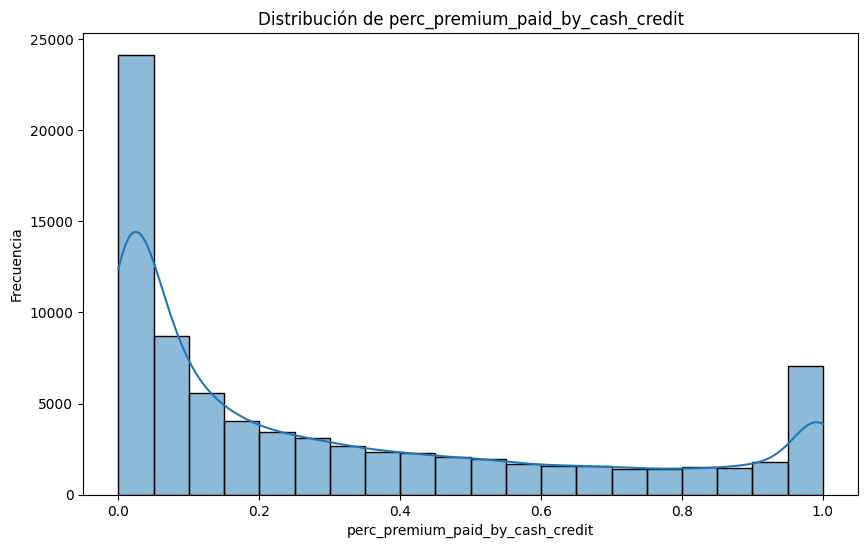

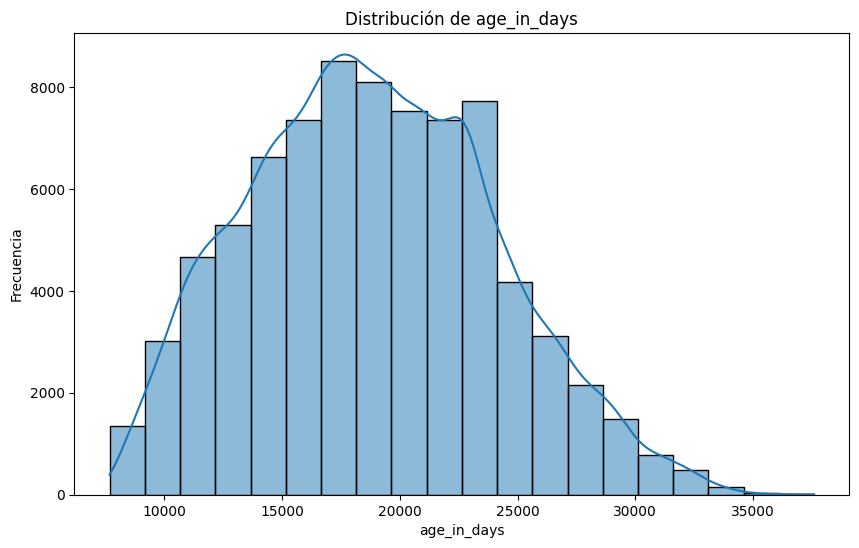

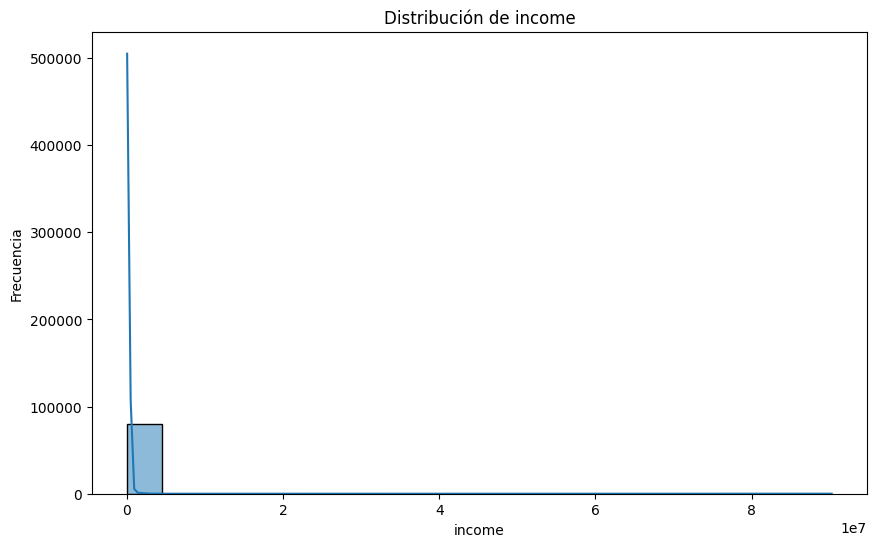

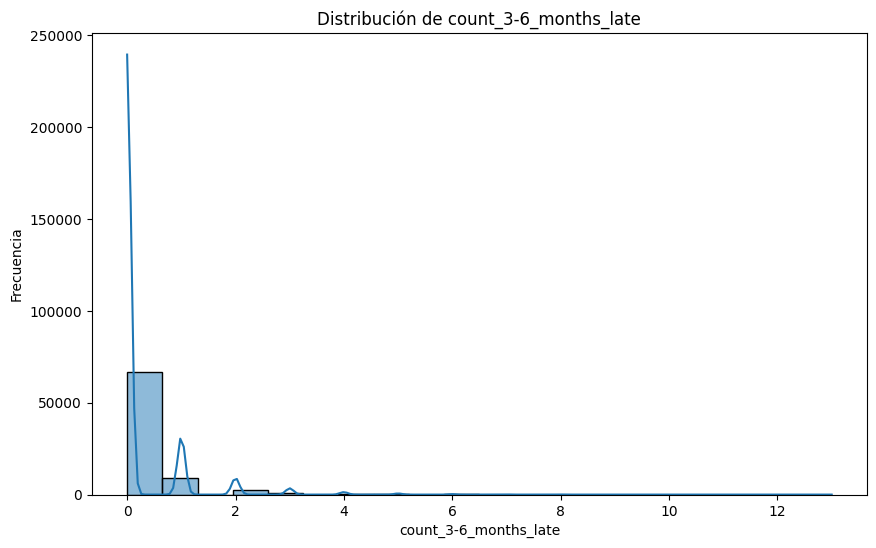

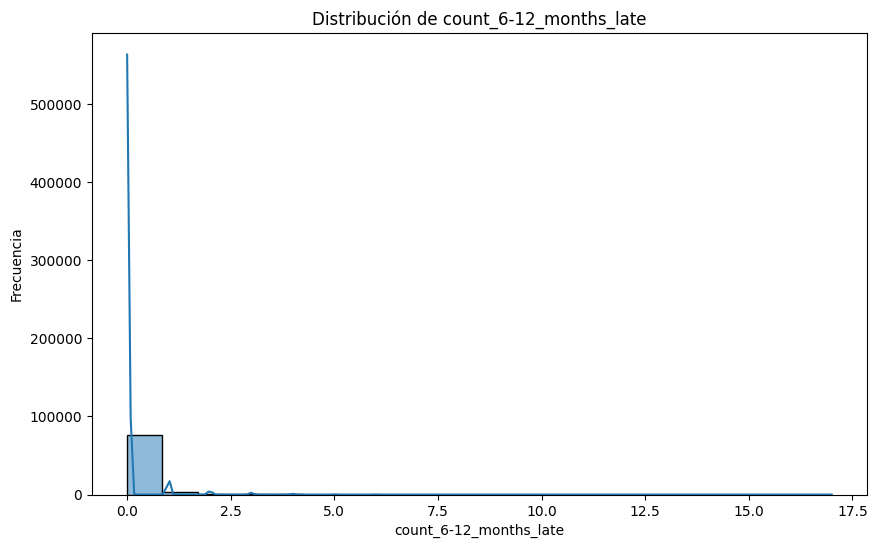

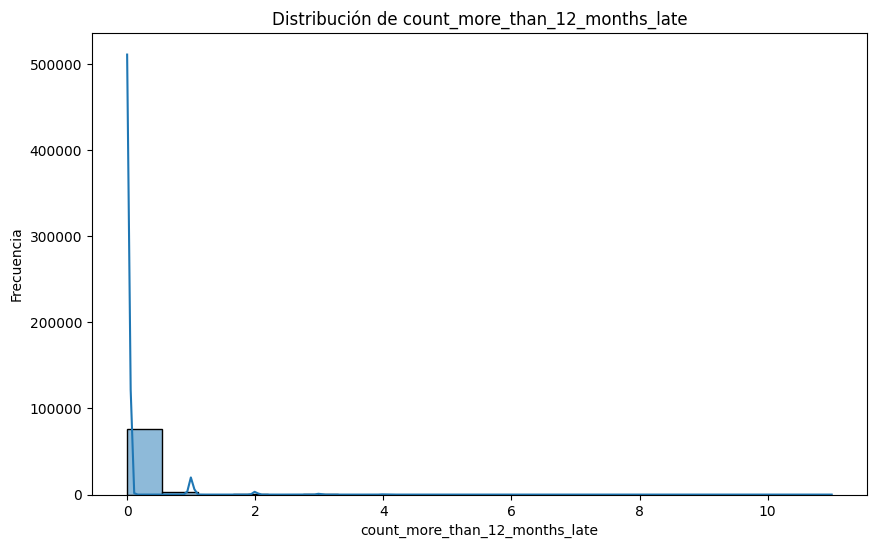

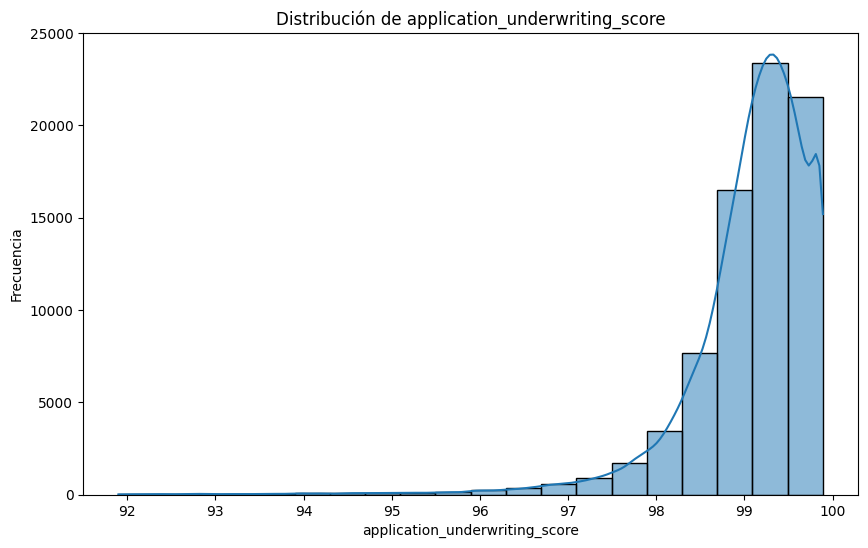

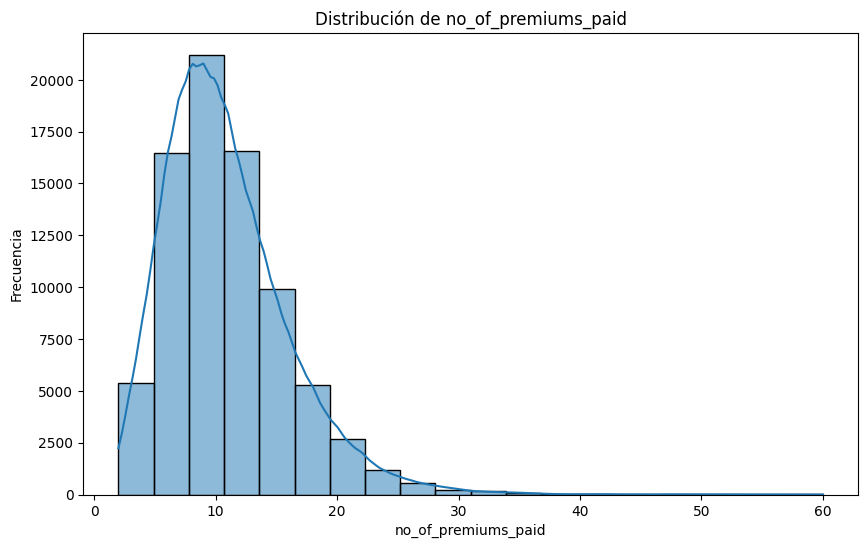

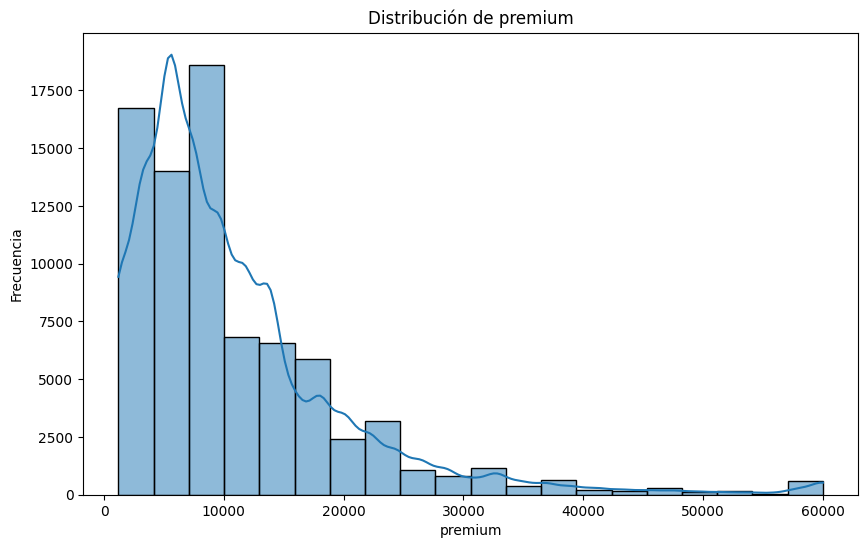

In [158]:
# histogramas
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(data_clean[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.savefig(f'images/univariable/histograms/hist_{col}.png')
    plt.show()
    plt.close()

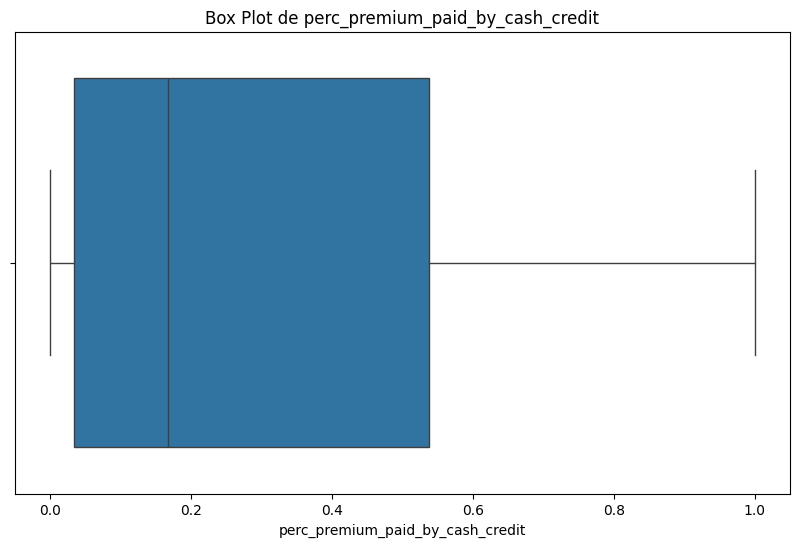

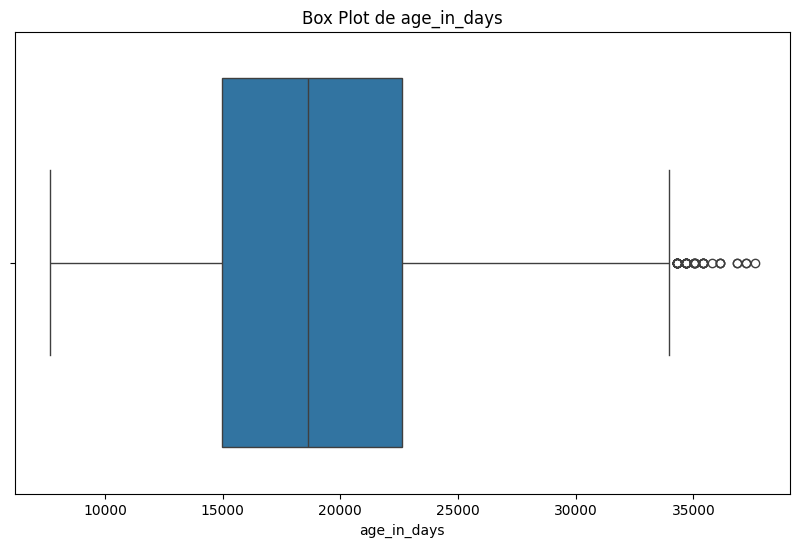

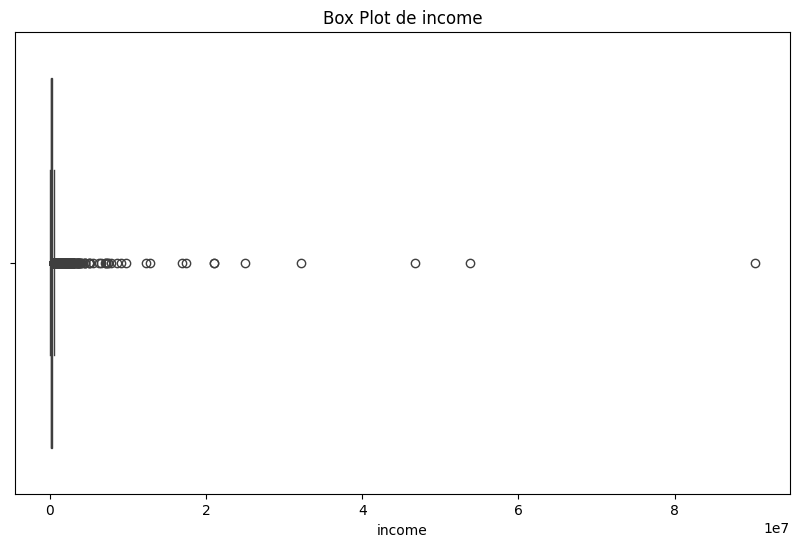

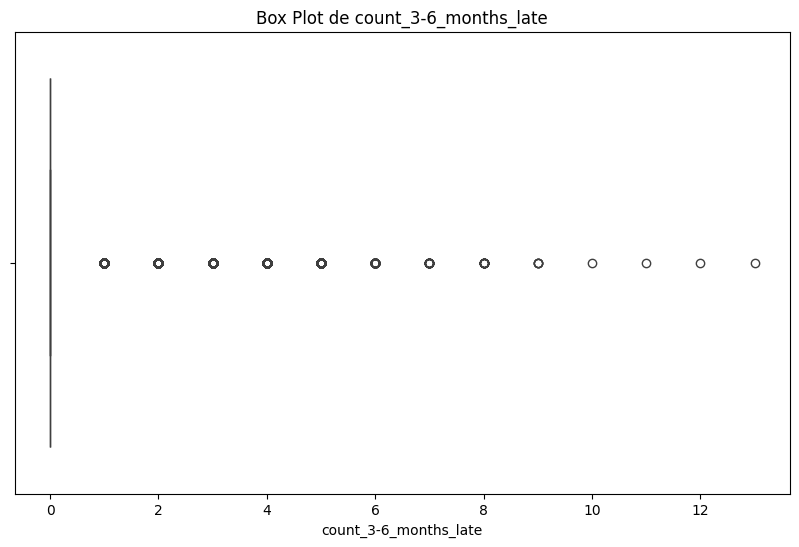

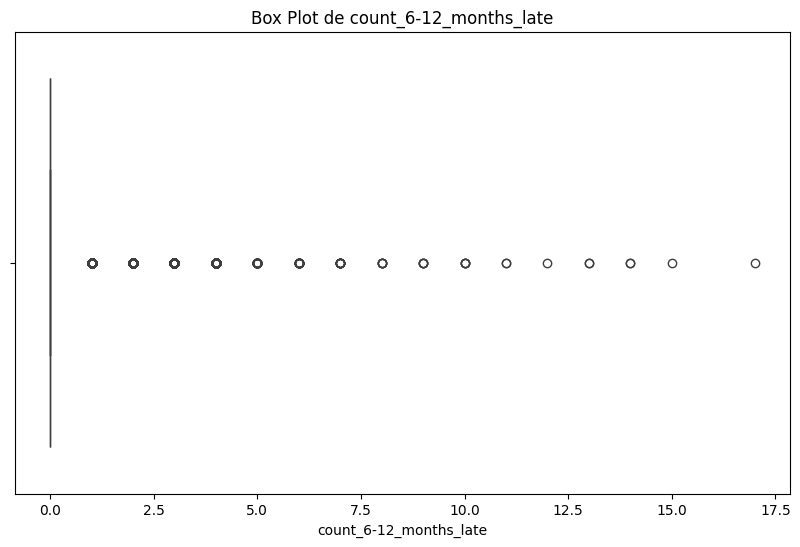

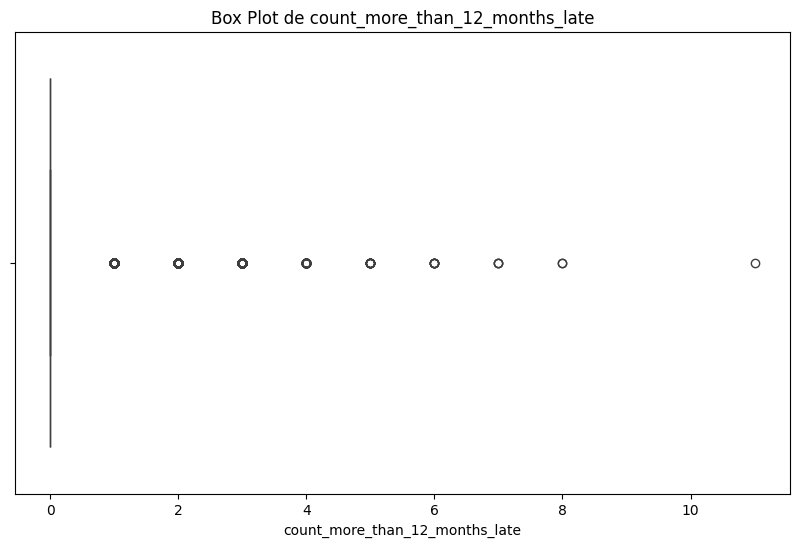

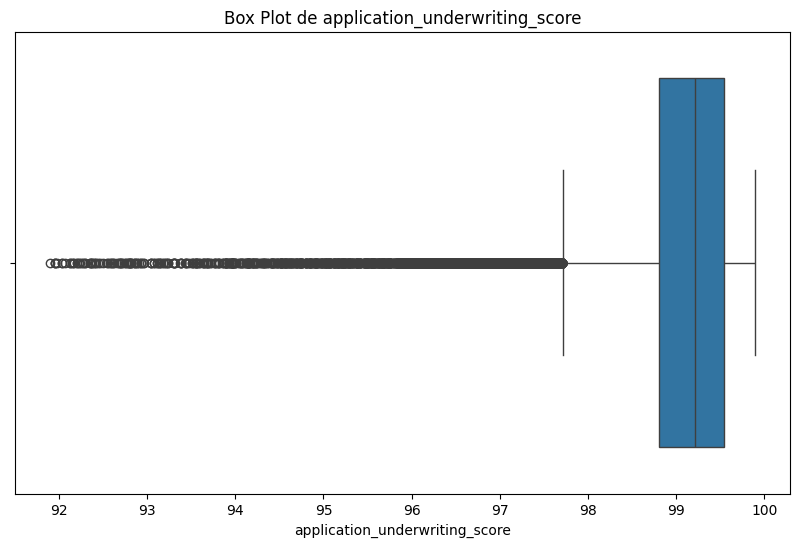

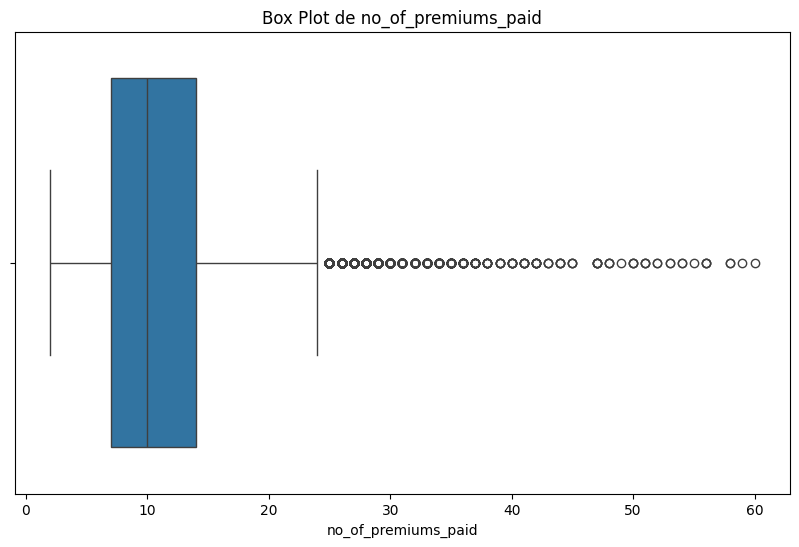

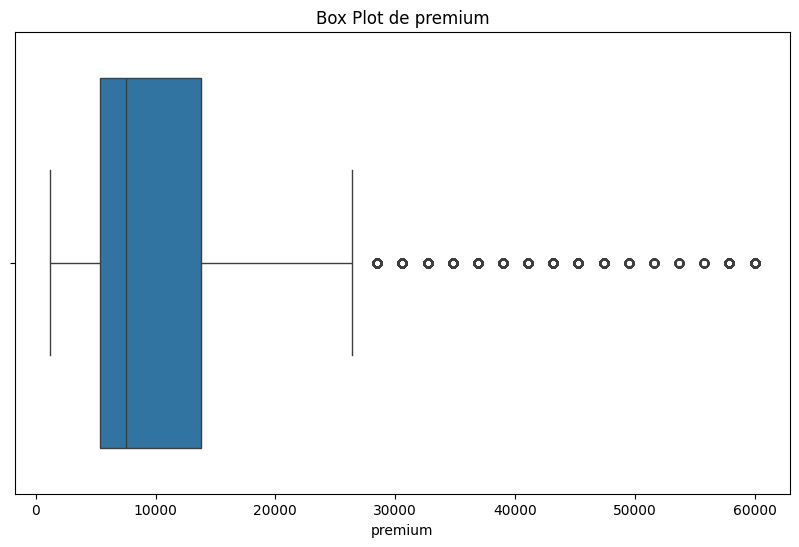

In [159]:
# box plots
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data_clean[col])
    plt.title(f'Box Plot de {col}')
    plt.xlabel(col)
    plt.savefig(f'images/univariable/boxplots/boxplot_{col}.png')
    plt.show()
    plt.close()

[Regresar a la Tabla de Contenido](#id0)

<div id = "id19" >

#### **5.1.3 *Variables Categóricas***

In [160]:
# descripción estadística variables categóricas
categorical_cols = data_clean.select_dtypes(include=['category', 'object']).columns
print("Columnas Categóricas:", categorical_cols.tolist())
data_clean[categorical_cols].describe()

Columnas Categóricas: ['sourcing_channel', 'residence_area_type', 'renewal']


,sourcing_channel,residence_area_type,renewal
count,79853,79853,79853
unique,5,2,2
top,A,Urban,1
freq,43134,48183,74855



Tabla de frecuencia top 5 para sourcing_channel (total únicas: 5):
sourcing_channel
A    43134
B    16512
C    12039
D     7559
E      609
Name: count, dtype: int64


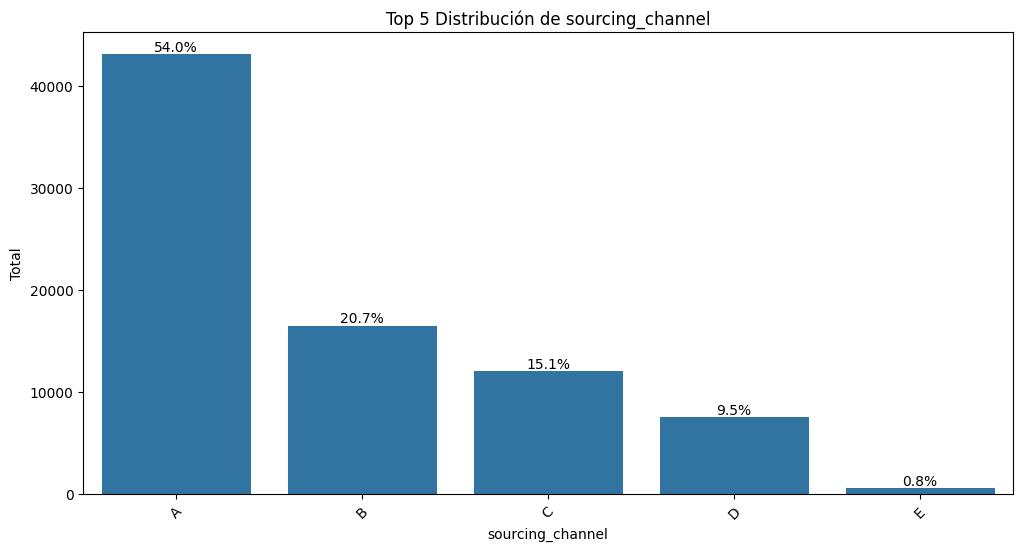


Tabla de frecuencia top 2 para residence_area_type (total únicas: 2):
residence_area_type
Urban    48183
Rural    31670
Name: count, dtype: int64


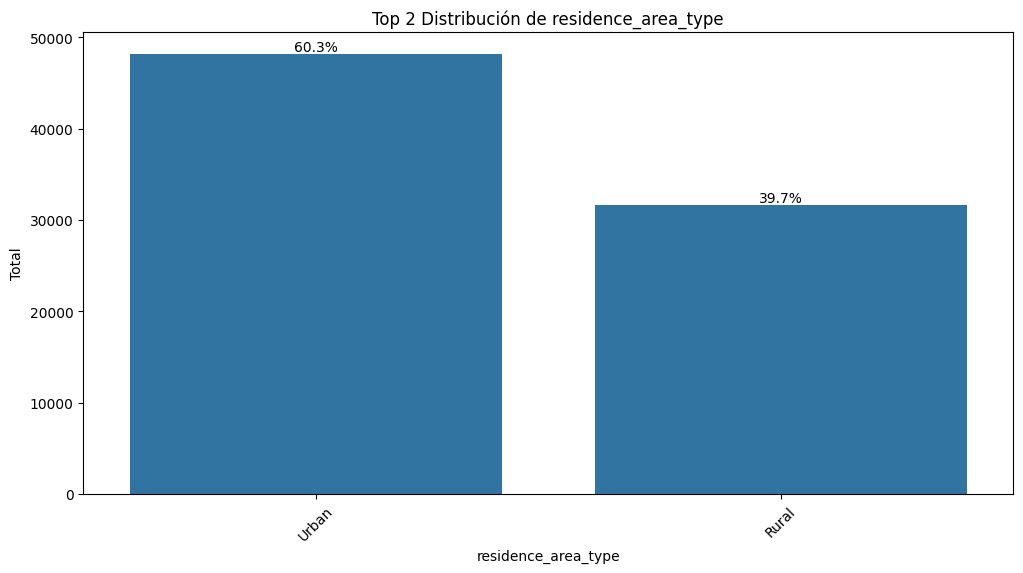


Tabla de frecuencia top 2 para renewal (total únicas: 2):
renewal
1    74855
0     4998
Name: count, dtype: int64


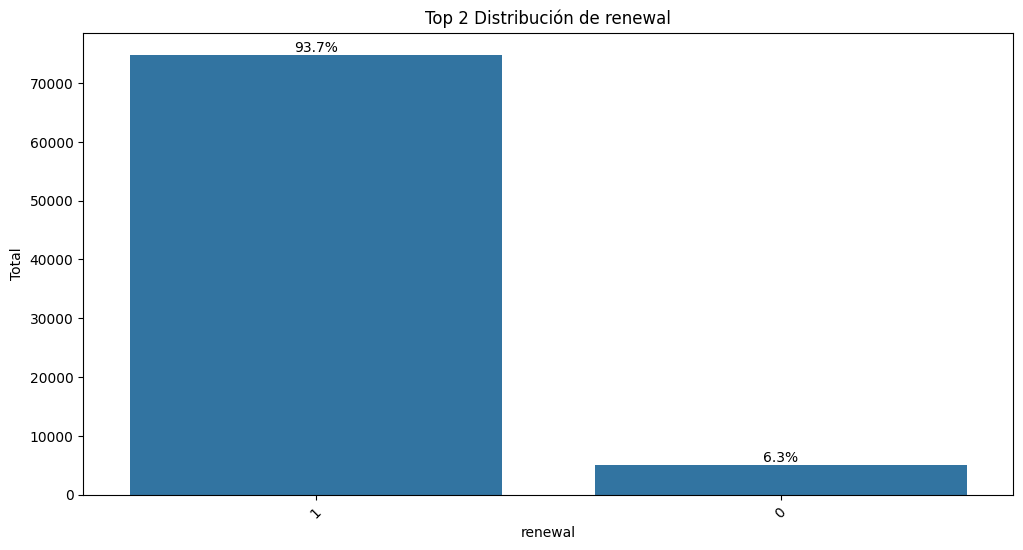

In [161]:
# tablas de frecuencia y bar plots
for col in categorical_cols:
    unique_count = data_clean[col].nunique()
    top_n = 10 if unique_count > 10 else unique_count
    order = data_clean[col].value_counts().head(top_n).index

    print(f'\nTabla de frecuencia top {top_n} para {col} (total únicas: {unique_count}):')
    print(data_clean[col].value_counts().head(top_n))

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=data_clean, x=col, order=order)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height/len(data_clean)*100:.1f}%', ha='center', va='bottom')
    plt.title(f'Top {top_n} Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Total')
    plt.xticks(rotation=45)
    plt.savefig(f'images/univariable/barplots/barplot_{col}.png')
    plt.show()
    plt.close()

[Regresar a la Tabla de Contenido](#id0)

<div id = "id20" >

### **5.2 Análisis Bivariable**

Relación entre las variables con la variable objetivo (`renewal`).

In [162]:
# eliminamos la variable objetivo (renewal) de las columnas numéricas/categóricas
numerical_cols = [col for col in data_clean.select_dtypes(include=[np.number]).columns if col != 'renewal']
categorical_cols = [col for col in data_clean.select_dtypes(include=['object', 'category']).columns if col != 'renewal']

[Regresar a la Tabla de Contenido](#id0)

<div id = "id21" >

#### **5.2.1 *Númericas vs Objetivo***

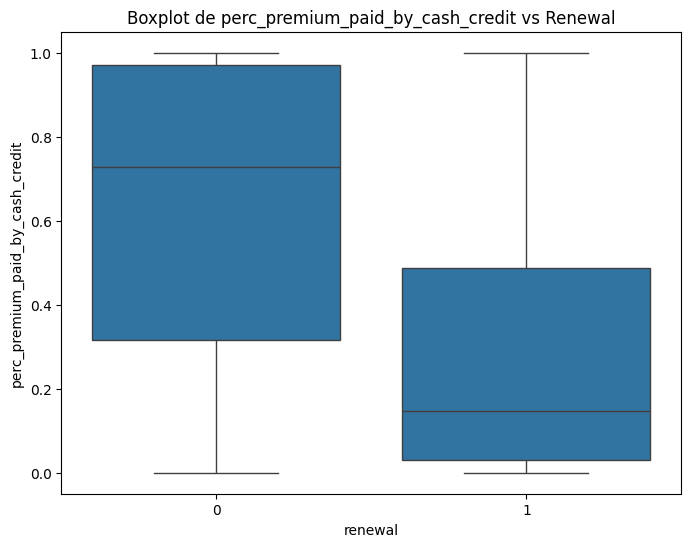

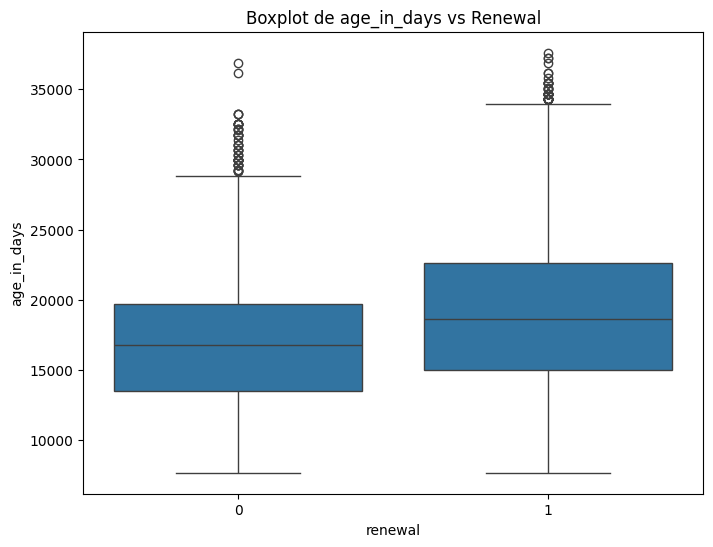

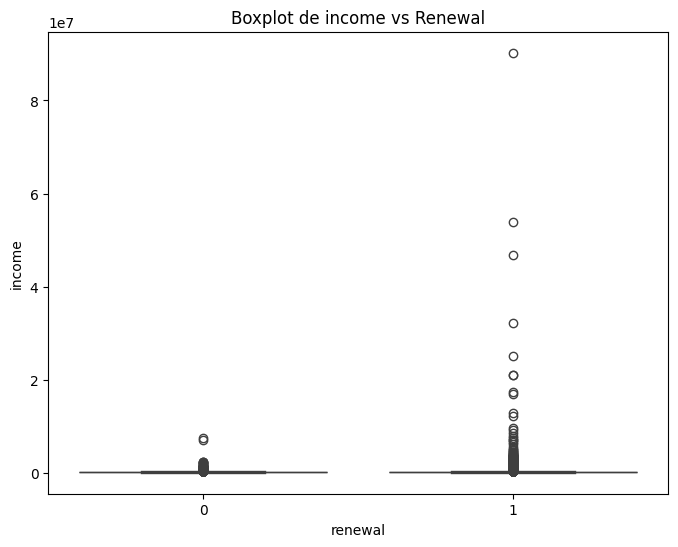

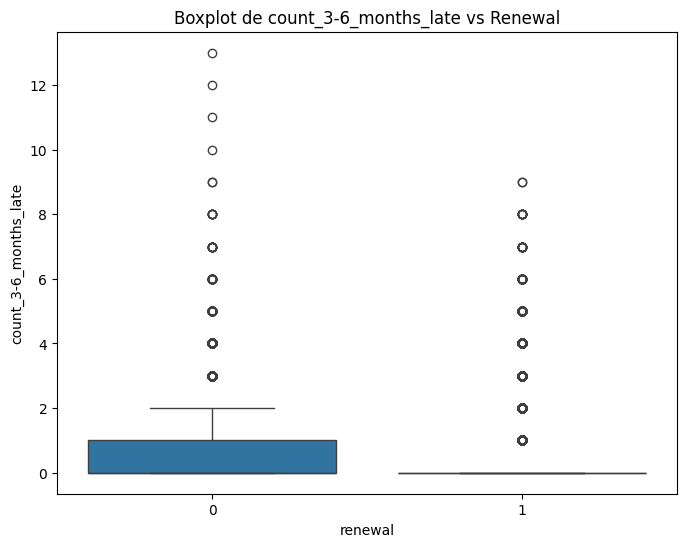

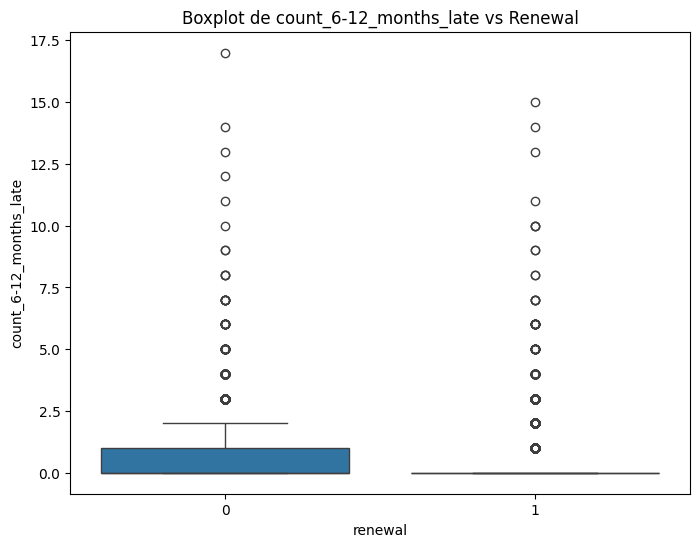

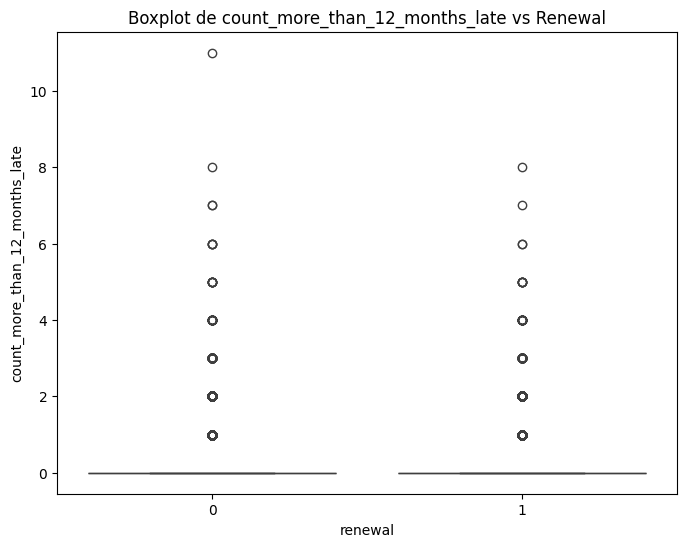

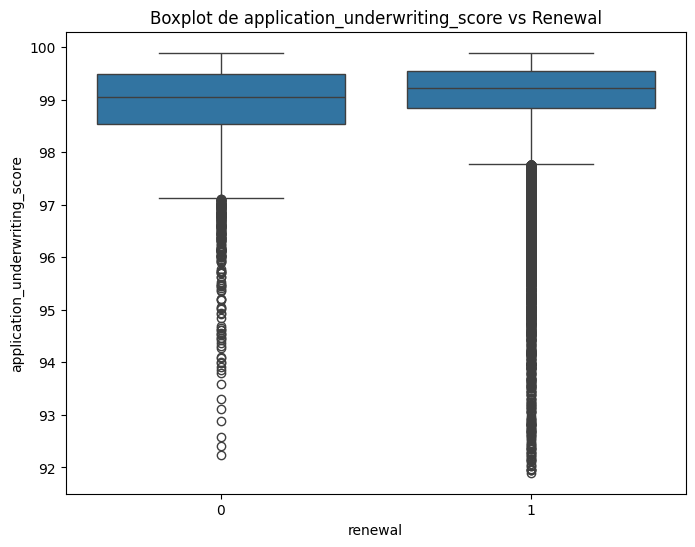

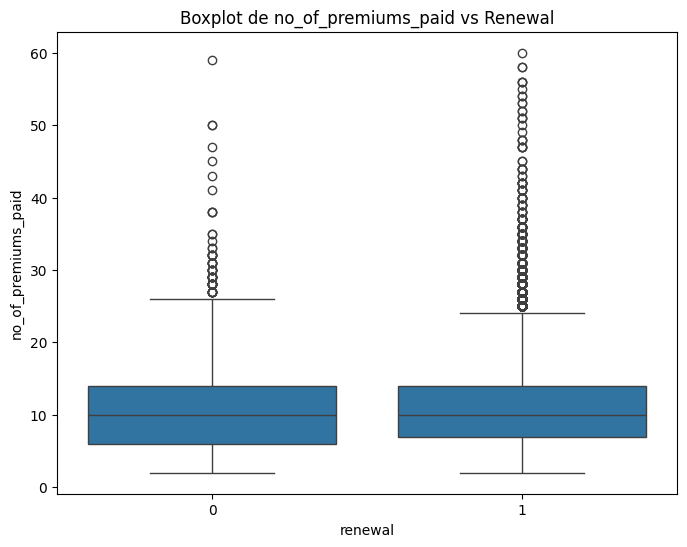

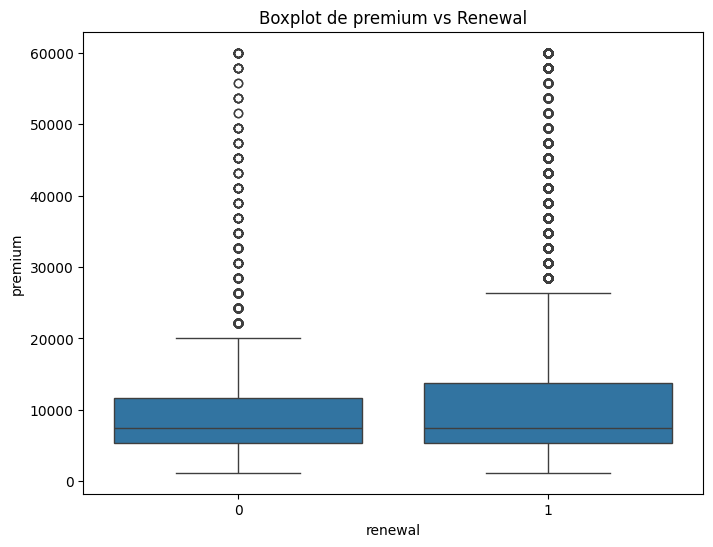

In [163]:
# boxplots para cada variable numérica vs 'renewal'
for var in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='renewal', y=var, data=data_clean)
    plt.title(f'Boxplot de {var} vs Renewal')
    plt.savefig(f'images/bivariable/boxplots/boxplot_{var}.png')
    plt.show()
    plt.close()

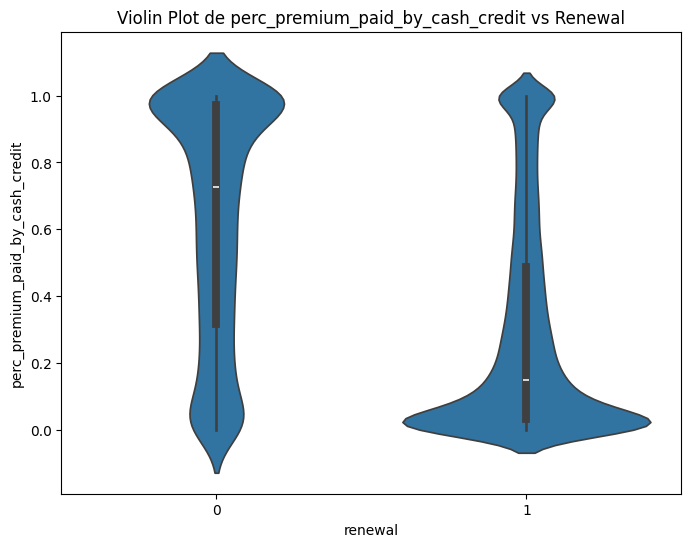

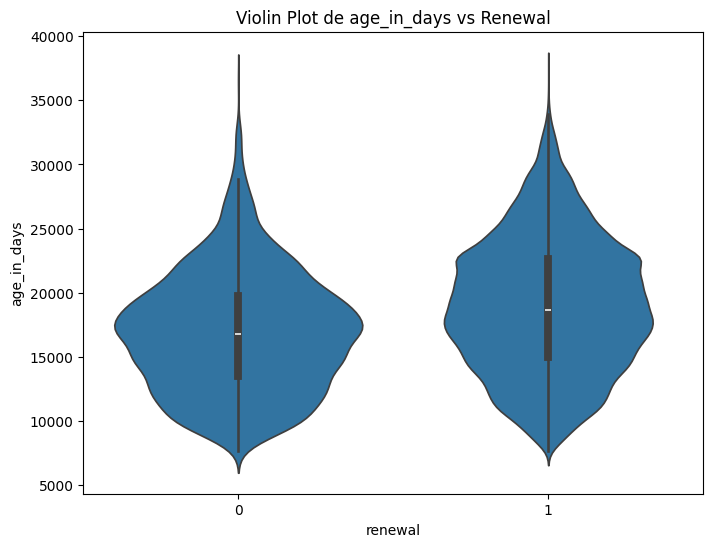

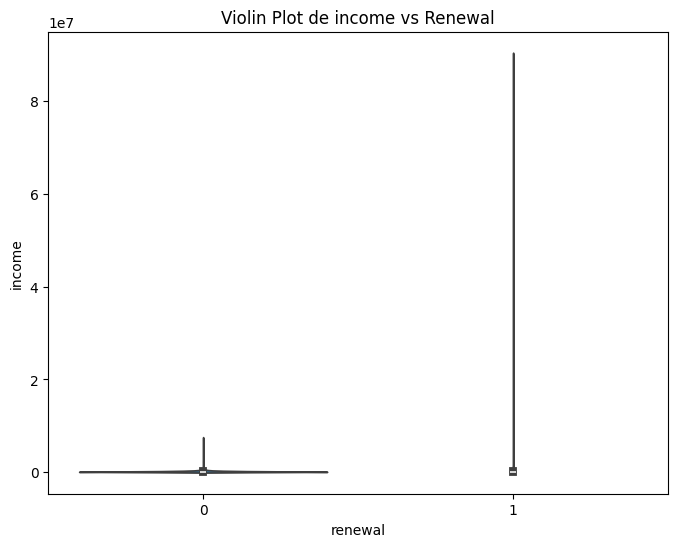

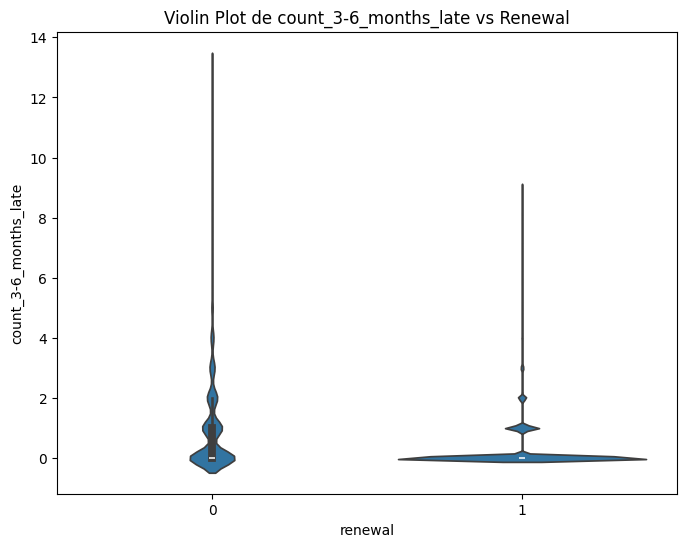

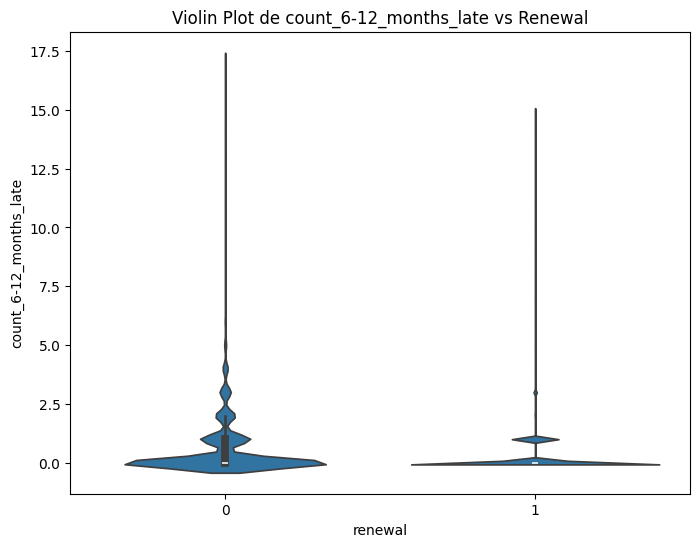

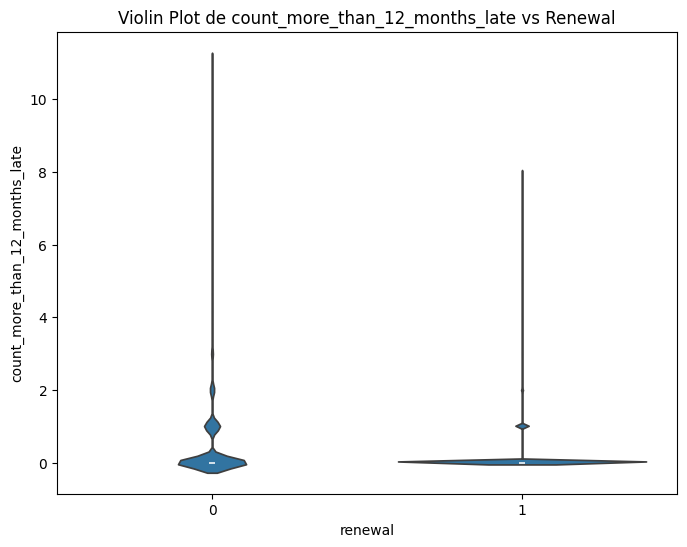

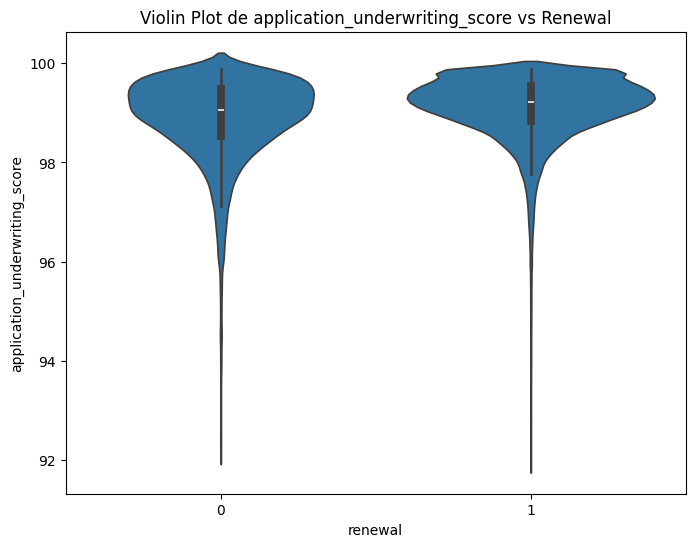

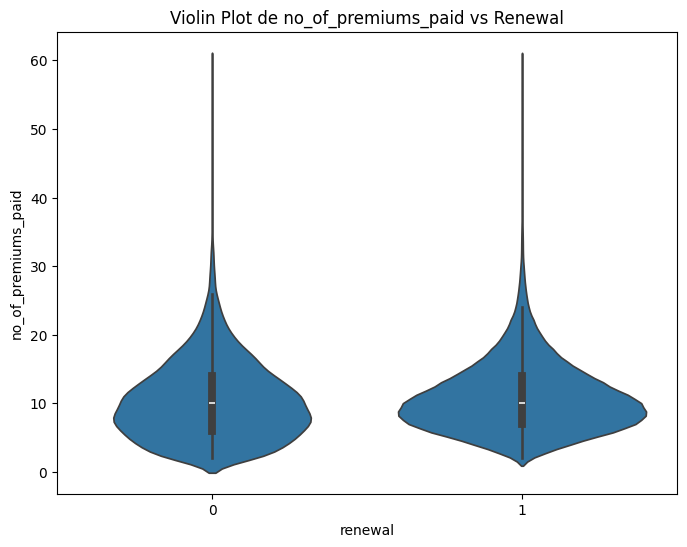

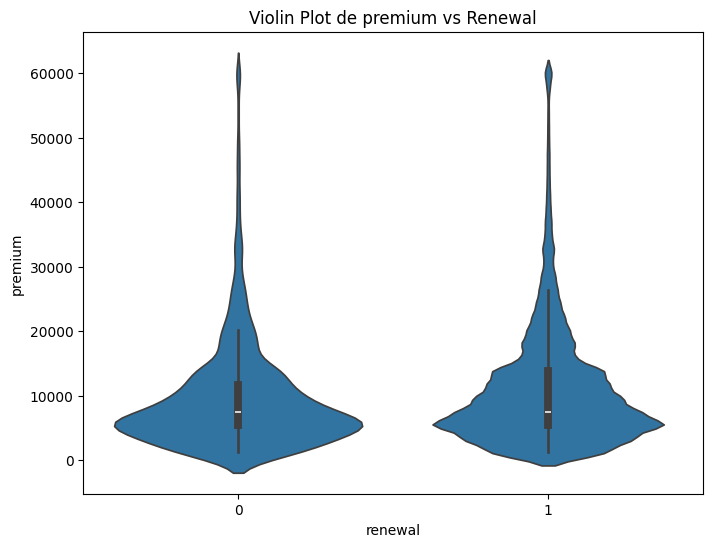

In [164]:
# violin plots para observar diferencias en dispersión, mediana y densidad de cada variable entre las 2 categorías de 'renewal'
for var in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='renewal', y=var, data=data_clean)
    plt.title(f'Violin Plot de {var} vs Renewal')
    plt.ylabel(var)
    plt.savefig(f'images/bivariable/violinplots/violinplot_{var}.png')
    plt.show()
    plt.close()

In [165]:
# significancia de cada variable usando Kruskal-Wallis
for var in numerical_cols:
    groups = [data_clean[data_clean['renewal'] == level][var].dropna() for level in data_clean['renewal'].unique()]
    stat, p = kruskal(*groups)
    print(f"Kruskal-Wallis para {var}: p-value = {p:.3f} {'(Significativa)' if p < 0.05 else ''}")

Kruskal-Wallis para perc_premium_paid_by_cash_credit: p-value = 0.000 (Significativa)
Kruskal-Wallis para age_in_days: p-value = 0.000 (Significativa)
Kruskal-Wallis para income: p-value = 0.000 (Significativa)
Kruskal-Wallis para count_3-6_months_late: p-value = 0.000 (Significativa)
Kruskal-Wallis para count_6-12_months_late: p-value = 0.000 (Significativa)
Kruskal-Wallis para count_more_than_12_months_late: p-value = 0.000 (Significativa)
Kruskal-Wallis para application_underwriting_score: p-value = 0.000 (Significativa)
Kruskal-Wallis para no_of_premiums_paid: p-value = 0.000 (Significativa)
Kruskal-Wallis para premium: p-value = 0.000 (Significativa)


In [166]:
# 'describe' agrupado por 'renewal'
grouped_describe = data_clean.groupby('renewal')[numerical_cols].describe()
grouped_describe

perc_premium_paid_by_cash_credit                                  \
                                   count      mean       std  min    25%   
renewal                                                                    
0                                 4998.0  0.626626  0.352369  0.0  0.317   
1                                74855.0  0.293433  0.323140  0.0  0.031   

                           age_in_days                ... no_of_premiums_paid  \
           50%    75%  max       count          mean  ...                 75%   
renewal                                               ...                       
0        0.728  0.971  1.0      4998.0  16929.642657  ...                14.0   
1        0.148  0.487  1.0     74855.0  18974.696867  ...                14.0   

               premium                                                     \
          max    count          mean          std     min     25%     50%   
renewal                                                                     
0        59.0   4998.0   9599.519808  8610.731129  1200.0  5400.0  7500.0   
1        60.0  74855.0  11012.975753  9445.566438  1200.0  5400.0  7500.0   

                           
             75%      max  
renewal                    
0        11700.0  60000.0  
1        13800.0  60000.0  

[2 rows x 72 columns]

In [167]:
grouped_describe.to_csv('data/grouped_describe_by_renewal_num.csv') # guardar en csv

[Regresar a la Tabla de Contenido](#id0)

<div id = "id22" >

#### **5.2.2 *Categóricas vs Objetivo***


Frecuencias de sourcing_channel por Renewal (top 5):
renewal              0      1
sourcing_channel             
A                 2349  40785
B                 1066  15446
C                  903  11136
D                  634   6925
E                   46    563


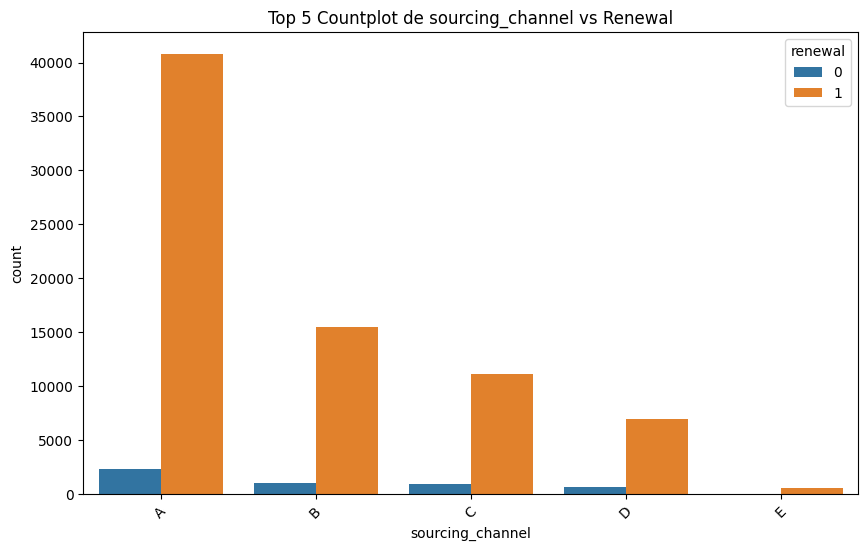


Frecuencias de residence_area_type por Renewal (top 2):
renewal                 0      1
residence_area_type             
Rural                1998  29672
Urban                3000  45183


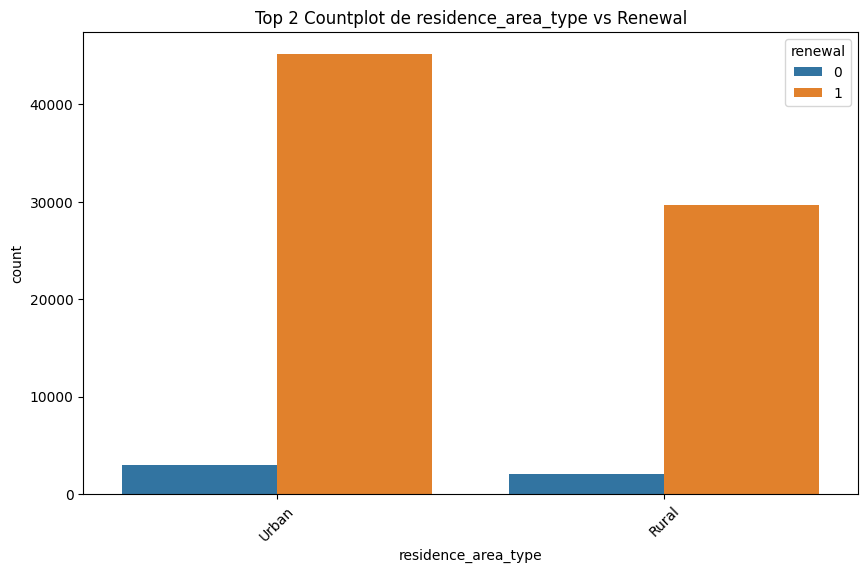

In [168]:
# countplots para cada variable categórica vs 'renewal'
for var in categorical_cols:
    unique_count = data_clean[var].nunique()
    top_n = 10 if unique_count > 10 else unique_count

    # obtener las top n categorías
    top_categories = data_clean[var].value_counts().head(top_n).index

    # print de frecuencias por 'renewal'
    print(f"\nFrecuencias de {var} por Renewal (top {top_n}):")
    crosstab = pd.crosstab(
        data_clean[data_clean[var].isin(top_categories)][var],
        data_clean['renewal']
    )
    print(crosstab)

    # filtrar para incluir solo esas categorías
    filtered_data = data_clean[data_clean[var].isin(top_categories)]

    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='renewal', data=filtered_data, order=top_categories)
    plt.title(f'Top {top_n} Countplot de {var} vs Renewal')
    plt.xticks(rotation=45)
    plt.savefig(f'images/bivariable/countplots/countplot_{var}.png')
    plt.show()
    plt.close()

<Figure size 1000x600 with 0 Axes>

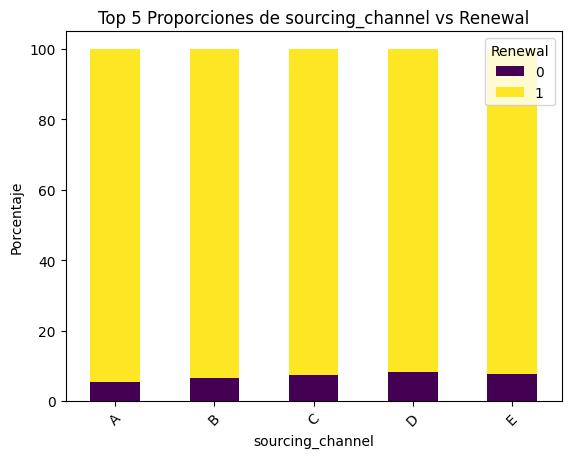

<Figure size 1000x600 with 0 Axes>

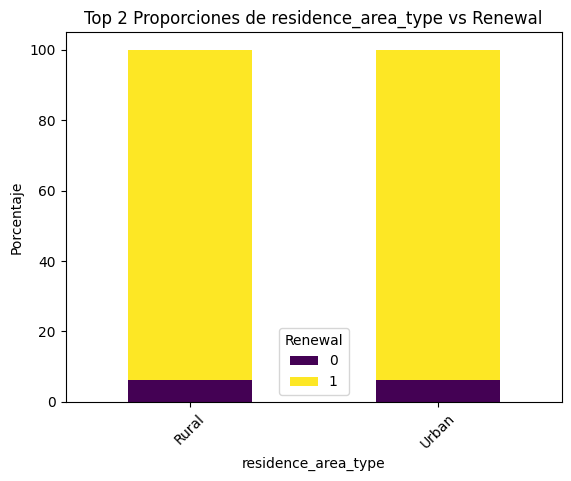

In [169]:
# stacked bar plots para visualizar proporciones
for var in categorical_cols:
    unique_count = data_clean[var].nunique()
    top_n = 10 if unique_count > 10 else unique_count
    top_categories = data_clean[var].value_counts().head(top_n).index
    filtered_data = data_clean[data_clean[var].isin(top_categories)]
    crosstab = pd.crosstab(filtered_data[var], filtered_data['renewal'], normalize='index') * 100
    plt.figure(figsize=(10, 6))
    crosstab.plot(kind='bar', stacked=True, cmap='viridis')
    plt.title(f'Top {top_n} Proporciones de {var} vs Renewal')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)
    plt.legend(title='Renewal')
    plt.savefig(f'images/bivariable/stackedbarplots/stackedbarplot_{var}.png')
    plt.show()
    plt.close()

    crosstab.to_csv(f'data/crosstabs/proporciones_{var}_renewal.csv')

In [170]:
# test de Chi-cuadrado para calcular significancia de cada variable
for var in categorical_cols:
    contingency_table = pd.crosstab(data_clean[var], data_clean['renewal'])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-cuadrado para {var} vs renewal: p-value = {p:.3f} {'(Significativa)' if p < 0.05 else ''}")

Chi-cuadrado para sourcing_channel vs renewal: p-value = 0.000 (Significativa)
Chi-cuadrado para residence_area_type vs renewal: p-value = 0.648 


In [171]:
# describe agrupado por 'renewal'
grouped_describe_cat = data_clean.groupby('renewal')[categorical_cols].describe()
grouped_describe_cat

sourcing_channel                   residence_area_type                \
                   count unique top   freq               count unique    top   
renewal                                                                        
0                   4998      5   A   2349                4998      2  Urban   
1                  74855      5   A  40785               74855      2  Urban   

                
          freq  
renewal         
0         3000  
1        45183

In [172]:
grouped_describe_cat.to_csv('data/grouped_describe_by_renewal_cat.csv')

[Regresar a la Tabla de Contenido](#id0)

<div id = "id23" >

## **6. Conclusiones del EDA**

### **Análisis Univariable**

#### **Hallazgos y Conclusiones de Variables Numéricas**

1. **`perc_premium_paid_by_cash_credit`**

   - **Hallazgos:** Rango 0–1, media ≈0.31, mediana 0.17, con un 75% de los clientes por debajo de ≈0.54. Distribución fuertemente sesgada a la derecha: muchos valores cercanos a 0 y una cola larga hacia valores altos.

   - **Conclusión:** La mayoría de clientes paga una fracción moderada o baja de la prima mediante efectivo/crédito, mientras que un grupo más pequeño paga casi el 100%. Este patrón sugiere comportamientos de pago heterogéneos que pueden estar asociados con diferentes niveles de compromiso o riesgo de no renovación.

2. **`age_in_days`**

   - **Hallazgos:** Rango entre ≈7,670 y ≈37,602 días (aprox. 21 a 103 años), media ≈18,847 días (≈51–52 años) y mediana ≈18,625 días. Distribución relativamente amplia pero sin valores extremos sospechosos.

   - **Conclusión:** La cartera cubre principalmente adultos de mediana edad y mayores, consistente con pólizas de vida/seguros a largo plazo. La edad es una variable relevante para entender patrones de renovación, pero no presenta problemas de calidad de datos.

3. **`income`**

   - **Hallazgos:** Rango muy amplio: mínimo ≈24,030 y máximo superior a 90 millones. Desviación estándar muy alta, indicando la presencia de outliers fuertes en ingresos. Las medidas de posición (25%, 50%, 75%) se concentran bastante por debajo del máximo.

   - **Conclusión:** La distribución de ingresos está fuertemente sesgada por unos pocos clientes con ingresos extremadamente altos. Se requiere un tratamiento robusto para evitar que estos outliers distorsionen el modelado.

4. **`count_3-6_months_late`**

   - **Hallazgos:** Media ≈0.25, mediana 0, máximo 13. La mayoría de los clientes (percentiles 25%, 50% y 75%) tienen 0 atrasos en este rango; solo una minoría presenta varios atrasos.

   - **Conclusión:** Los atrasos de 3 a 6 meses son poco frecuentes, pero cuando aparecen lo hacen con valores altos, representando un segmento de clientes de mayor riesgo.

5. **`count_6-12_months_late`**

   - **Hallazgos:** Media ≈0.08, mediana 0, máximo 17. Casi todos los clientes no presentan atrasos en este rango; los que sí, conforman una cola larga de la distribución.

   - **Conclusión:** Los atrasos de 6 a 12 meses son aún más raros, pero su presencia indica comportamientos de impago prolongados que pueden estar fuertemente vinculados con la no renovación.

6. **`count_more_than_12_months_late`**

   - **Hallazgos:** Media ≈0.06, mediana 0, máximo 11. La distribución es muy concentrada en 0 atrasos con algunos casos extremos.

   - **Conclusión:** Atrasos mayores a 12 meses son eventos poco frecuentes pero muy críticos. Estos clientes representan un perfil de alto riesgo que puede ser clave para identificar probables no renovaciones.

7. **`application_underwriting_score`**

   - **Hallazgos:** Media ≈99.07, rango entre ≈91.9 y 99.89, con percentiles muy concentrados alrededor de 99. La variabilidad es baja (desviación estándar ≈0.74).

   - **Conclusión:** La mayoría de clientes tiene un puntaje de suscripción alto y concentrado, lo que sugiere que la compañía trabaja principalmente con un perfil de riesgo relativamente bueno. A pesar de su baja dispersión, pequeñas diferencias en esta puntuación resultan estadísticamente significativas frente a la renovación, por lo que sigue siendo relevante para el modelo.

8. **`no_of_premiums_paid`**

   - **Hallazgos:** Media ≈10.86, mediana 10, rango de 2 a 60 primas pagadas. El 50% de los clientes ha pagado entre 7 y 14 primas.

   - **Conclusión:** La mayoría de los asegurados tiene un historial moderado de pagos regulares, lo que refleja cierto nivel de antigüedad y compromiso con la póliza. Este historial puede influir en la decisión de continuar o no con la renovación.

9. **`premium`**

   - **Hallazgos:** Rango entre 1,200 y 60,000, con media ≈10,925 y mediana 7,500. Distribución sesgada a la derecha: muchas pólizas de primas bajas/medias y un grupo reducido con primas muy altas.

   - **Conclusión:** La cartera está compuesta principalmente por pólizas de montos moderados, mientras que las pólizas de alta prima constituyen un segmento pequeño pero relevante en ingresos. Esta variable es crítica para analizar el impacto económico de la renovación y la estrategia de incentivos.

#### **Hallazgos y Conclusiones de Variables Categóricas**

1. **`sourcing_channel`**

   - **Hallazgos:** 5 canales (`A`, `B`, `C`, `D`, `E`). El canal `A` concentra la mayoría de clientes (≈43,000), seguido por `B` y `C`; `D` y `E` son minoritarios, especialmente `E`.

   - **Conclusión:** El canal `A` es el principal motor de adquisición de clientes, por lo que cualquier estrategia de incentivos o gestión comercial debe prestar atención especial a este canal. Los canales pequeños, como `E`, podrían tener nichos específicos o menor eficiencia comercial.

2. **`residence_area_type`**

   - **Hallazgos:** Dos categorías: `Urban` (≈48,000) y `Rural` (resto). La mayoría de asegurados reside en zonas urbanas.

   - **Conclusión:** La cartera está sesgada hacia clientes urbanos, lo cual puede reflejar la ubicación de la base de clientes de la compañía y el acceso a canales comerciales. Sin embargo, este desbalance no parece tener un impacto directo en la renovación.

3. **`renewal (variable objetivo)`**

   - **Hallazgos:** Variable binaria con fuerte desbalance: ≈93.7% de clientes *renuevan* (1) y solo ≈6.3% *no renuevan* (0).

   - **Conclusión:** El problema es una clasificación altamente desbalanceada. Deberán considerarse técnicas de balanceo para no sesgarse hacia la clase mayoritaria y realmente aprender a identificar casos de no renovación.

#### **Conclusiones Generales del Análisis Univariable**

- **Distribuciones sesgadas y outliers:** Varias variables numéricas (`income`, `premium`, `conteos de atrasos`) están sesgadas a la derecha y presentan valores extremos. Esto exige escalado/normalización y posible tratamiento de outliers antes del modelado.

- **Histórico de pagos y comportamiento de atraso:** La mayoría de clientes paga puntualmente, pero existe un subgrupo con varios atrasos en distintos rangos de tiempo. Este grupo es clave para entender el riesgo de no renovación.

- **Desbalance en la variable objetivo:** La tasa de no renovación es baja (~6.3%). Este desbalance dificulta la detección de clientes en riesgo si no se corrige durante la fase de modelado.

- **Canales y residencia:** El canal `A` y las zonas `urbanas` concentran la mayoría de la cartera, lo que marcará el foco de cualquier estrategia de segmentación e incentivos.

### **Análisis Bivariable**

#### **Análisis de Variables Numéricas vs Objetivo (Renewal)**

**Hallazgos:**

- Todas las variables numéricas analizadas muestran diferencias estadísticamente significativas entre clientes que *renuevan* y *no renuevan*, según la prueba de Kruskal-Wallis (p-value = 0.000 en todos los casos).

- Comparando estadísticas por grupo (`renewal = 0` vs `renewal = 1`):

  - **`perc_premium_paid_by_cash_credit`:** Los clientes que *no renuevan* tienen, en promedio, un mayor porcentaje pagado por efectivo/crédito (media ≈0.63, mediana ≈0.73) comparado con quienes *sí renuevan* (media ≈0.29, mediana ≈0.15).

  - **`age_in_days`:** Los clientes que *renuevan* tienden a ser ligeramente mayores (≈18,975) en promedio que los que *no renuevan* (≈16,930).

  - **`premium`:** Los clientes que *renuevan* tienen, en promedio, una prima algo más alta (≈11,013) que los que *no renuevan* (≈9,600).

  - Para las variables de atrasos y número de primas pagadas se observan diferencias significativas en la distribución (según Kruskal), aunque la mayoría de los valores sigue concentrada en rangos bajos.

**Conclusiones:**

- **Predictividad estadística:** El hecho de que todas las variables numéricas resulten significativas (`p<0.05`) confirma que aportan información relevante para distinguir entre clientes que renuevan y no renuevan.

- **Patrones de comportamiento de pago:** Los clientes que *no renuevan* muestran, en promedio, un patrón de pagos distinto (mayor fracción de prima en efectivo/crédito y patrones de atraso diferentes). Esto sugiere que ciertas prácticas de pago pueden servir como señales tempranas de riesgo de fuga.

- **Perfil económico y de edad:** Quienes renuevan tienden a tener primas más altas y ser ligeramente mayores, lo que podría indicar que clientes con más inversión en la póliza y más antigüedad/edad tienen mayor incentivo a continuar.

- **Implicaciones para el modelado:** Todas estas variables deben conservarse para el modelado, aplicando transformaciones adecuadas (escalado/normalización y manejo de outliers). Su relevancia estadística justifica su inclusión como candidatos importantes para el modelo de propensión a renovar.

#### **Hallazgos y Conclusiones de Análisis de Variables Categóricas vs Objetivo (Renewal)**

1. **`sourcing_channel` vs `renewal`**

   - **Hallazgos:**
     - Para ambos grupos (`renewal = 0` y `renewal = 1`), el canal `A` es el más frecuente.
     - La prueba de chi-cuadrado arroja p-value = 0.000 → asociación estadísticamente significativa entre canal de origen y renovación.

   - **Conclusión:** El canal de adquisición influye en la probabilidad de renovación. Algunos canales pueden atraer clientes más fieles que otros o con mejor encaje producto–cliente. Esto es clave para diseñar planes de incentivos diferenciados por canal, premiando a aquellos que traen clientes con mayor propensión a renovar.

2. **`residence_area_type` vs `renewal`**

   - **Hallazgos:**
     - Tanto entre quienes renuevan como entre quienes no renuevan, la mayoría reside en zonas `Urban`.
     - La prueba de chi-cuadrado arroja p-value = 0.648 → no hay evidencia estadística de asociación entre tipo de residencia y decisión de renovar.

   - **Conclusión:** A pesar de que la mayoría de la cartera es urbana, el tipo de área (`Urban`/`Rural`) *no explica diferencias significativas* en la renovación. Por tanto, esta variable tiene un rol más descriptivo que predictivo y no debería ser prioritaria en el modelo ni en la estrategia de incentivos.

3. **Distribución de `renewal` por categorías**

   - **Hallazgos:**
     - `renewal` está fuertemente desbalanceada (≈93.7% renovado, 6.3% no renovado).
     - Este desbalance se mantiene consistente a través de la mayoría de categorías de canal y residencia.

   - **Conclusión:** El desbalance de clases es una característica estructural del problema. Para poder identificar correctamente a los clientes que no renuevan, será indispensable aplicar técnicas de balanceo de clases en la fase de modelado.

##### **Conclusiones Generales**

- **Predictores clave de no renovación:** Las pruebas estadísticas (Kruskal-Wallis y chi-cuadrado) indican que todas las variables numéricas, así como el canal de adquisición, muestran diferencias significativas entre clientes que renuevan y no renuevan. En particular, destacan:

  - El patrón de pago (`perc_premium_paid_by_cash_credit`).
  - Los historiales de atraso (`count_3-6_months_late`, `count_6-12_months_late`, `count_more_than_12_months_late`).
  - El monto de la prima (`premium`).
  - El canal comercial (`sourcing_channel`).

- **Comportamiento de riesgo y compromiso:** Los clientes que no renuevan tienden a:

  - Tener patrones de pago diferenciados.
  - Mostrar comportamientos de atraso más marcados.
  - Presentar características económicas y demográficas ligeramente distintas.
    
    Esto respalda la hipótesis de que el comportamiento financiero e histórico de pago es un indicador fuerte del riesgo de no renovación.

- **Desbalance de clases y calidad de datos:**

  - La variable `renewal` está muy desbalanceada (≈93.7% renovaciones), lo que requiere aplicar técnicas como SMOTE u otras estrategias de balanceo.
  - Los niveles de nulos son bajos y concentrados en pocas variables (ya identificadas), por lo que la imputación es viable sin pérdida significativa de información.

* **Implicaciones para el modelo y el plan de incentivos:**

  - Las variables con mayor asociación con `renewal` deben priorizarse en el modelado y en la segmentación de clientes para el diseño del plan de incentivos.
  - El canal de adquisición se vuelve una palanca clave; puede utilizarse para ajustar incentivos según la calidad de los clientes que cada canal trae (propensión a renovar).
  - Dado el desbalance de la variable objetivo, la evaluación del modelo deberá ir más allá de la `accuracy`, priorizando métricas como `Recall` y `F1-score` para la clase de no renovación, ya que es el segmento de mayor interés para el negocio.

Con esto se concluye el EDA, y se proporciona la base para la siguiente etapa: preparación avanzada de datos (imputación, codificación, escalado, balanceo) y modelado predictivo para estimar la probabilidad de renovación y diseñar un plan óptimo de incentivos a agentes.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id24" >

## **7. Procesamiento de Datos Final para Modelamiento**

En esta sección se realiza la preparación del dataset para modelamiento predictivo de la propensión a renovar primas en políticas de seguros. Basado en el análisis exploratorio de datos (EDA), se abordarán pasos esenciales como el tratamiento de datos nulos mediante imputación, limpieza de datos atípicos (outliers), codificación de variables categóricas con one-hot encoding o label encoding, escalado/normalización de variables para uniformidad, análisis de correlaciones para detectar multicolinealidad, balanceo de datos para manejar el desbalance de clases, ingeniería de features (creación de nuevas variables) y selección/justificación de variables finales, asegurando que el dataset esté limpio, balanceado y optimizado para mejorar el rendimiento de los algoritmos predictivos y el plan de incentivos.

Antes de iniciar el preprocesamiento, se transforma la variable `age_in_days` a `age_in_years` para trabajar con una escala más adecuada para el modelo. Esta conversión facilita la lectura, reduce variabilidad innecesaria y evita distorsiones en el análisis de outliers.

In [173]:
# convertir age_in_days a age_in_years
data_clean['age_in_years'] = (data_clean['age_in_days'] / 365).astype(int)

# eliminar age_in_days
data_clean.drop(columns=['age_in_days'], inplace=True)

[Regresar a la Tabla de Contenido](#id0)

<div id = "id25" >

### **7.1 Tratamiento de datos nulos**

Dado que los valores nulos están concentrados en variables numéricas (`count_3-6_months_late`, `count_6-12_months_late`, `count_more_than_12_months_late`, `application_underwriting_score`), se opta por imputación con la mediana, ya que son distribuciones posiblemente sesgadas (conteos con outliers y puntuaciones), minimizando sesgos y manejando valores atípicos mejor que la media. No se usa KNNImputer ya que no hay correlaciones fuertes suficientes para justificar su complejidad.

In [174]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64 
 1   income                            79853 non-null  int64   
 2   count_3-6_months_late             79756 non-null  float64 
 3   count_6-12_months_late            79756 non-null  float64 
 4   count_more_than_12_months_late    79756 non-null  float64 
 5   application_underwriting_score    76879 non-null  float64 
 6   no_of_premiums_paid               79853 non-null  int64   
 7   sourcing_channel                  79853 non-null  category
 8   residence_area_type               79853 non-null  category
 9   premium                           79853 non-null  int64   
 10  renewal                           79853 non-null  category
 11  age_in_years                      79853 non-null  int6

In [175]:
data_clean.isnull().sum() / len(data_clean) * 100

perc_premium_paid_by_cash_credit    0.000000
income                              0.000000
count_3-6_months_late               0.121473
count_6-12_months_late              0.121473
count_more_than_12_months_late      0.121473
application_underwriting_score      3.724343
no_of_premiums_paid                 0.000000
sourcing_channel                    0.000000
residence_area_type                 0.000000
premium                             0.000000
renewal                             0.000000
age_in_years                        0.000000
dtype: float64

In [176]:
# columnas con datos nulos
null_cols = [
    'count_3-6_months_late',
    'count_6-12_months_late',
    'count_more_than_12_months_late',
    'application_underwriting_score'
]

# imputación con la mediana para numéricas con datos nulos
for col in null_cols:
    median_value = data_clean[col].median()
    data_clean[col] = data_clean[col].fillna(median_value)
    print(f"Imputada {col} con mediana: {median_value}")

Imputada count_3-6_months_late con mediana: 0.0
Imputada count_6-12_months_late con mediana: 0.0
Imputada count_more_than_12_months_late con mediana: 0.0
Imputada application_underwriting_score con mediana: 99.21


[Regresar a la Tabla de Contenido](#id0)

In [177]:
data_clean.isnull().sum() / len(data_clean) * 100 # dataset limpio sin datos nulos

perc_premium_paid_by_cash_credit    0.0
income                              0.0
count_3-6_months_late               0.0
count_6-12_months_late              0.0
count_more_than_12_months_late      0.0
application_underwriting_score      0.0
no_of_premiums_paid                 0.0
sourcing_channel                    0.0
residence_area_type                 0.0
premium                             0.0
renewal                             0.0
age_in_years                        0.0
dtype: float64

[Regresar a la Tabla de Contenido](#id0)

<div id = "id26" >

### **7.2 Limpieza de datos atípicos**

In [178]:
numerical_cols = [col for col in data_clean.select_dtypes(include=[np.number]).columns if col != 'renewal']

# resumen de outliers para variables numéricas
outlier_summary = {}

for col in numerical_cols:
    Q1, Q3 = data_clean[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    outliers = data_clean[(data_clean[col] < lower) | (data_clean[col] > upper)]

    outlier_summary[col] = {
        'Outliers': len(outliers),
        '(%)': round(len(outliers) / len(data_clean) * 100, 2),
        'Lím. Inferior': round(lower, 2),
        'Lím. Superior': round(upper, 2)
    }

outlier_summary_df = pd.DataFrame(outlier_summary).T
print("\nResumen de outliers para variables numéricas:")
print(outlier_summary_df)


Resumen de outliers para variables numéricas:
                                  Outliers    (%)  Lím. Inferior  \
perc_premium_paid_by_cash_credit       0.0   0.00          -0.72   
income                              3428.0   4.29     -108110.00   
count_3-6_months_late              12955.0  16.22           0.00   
count_6-12_months_late              3925.0   4.92           0.00   
count_more_than_12_months_late      3718.0   4.66           0.00   
application_underwriting_score      3784.0   4.74          97.80   
no_of_premiums_paid                 1426.0   1.79          -3.50   
premium                             4523.0   5.66       -7200.00   
age_in_years                          44.0   0.06           9.50   

                                  Lím. Superior  
perc_premium_paid_by_cash_credit           1.29  
income                                468210.00  
count_3-6_months_late                      0.00  
count_6-12_months_late                     0.00  
count_more_than_12_mon

In [179]:
# vista detallada de los primeros 5 outliers por variable
for col in numerical_cols:
    if col in data_clean.columns:
        Q1, Q3 = data_clean[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = data_clean[(data_clean[col] < lower) | (data_clean[col] > upper)]
        if not outliers.empty:
            print(f"\nOutliers en '{col}' (primeros 5):")
            print(outliers[[col]].head())


Outliers en 'income' (primeros 5):
     income
69   494050
92   900030
131  509070
141  510070
163  495070

Outliers en 'count_3-6_months_late' (primeros 5):
    count_3-6_months_late
2                     2.0
5                     2.0
7                     1.0
9                     2.0
10                    1.0

Outliers en 'count_6-12_months_late' (primeros 5):
    count_6-12_months_late
2                      3.0
7                      6.0
19                     2.0
40                    10.0
45                     1.0

Outliers en 'count_more_than_12_months_late' (primeros 5):
    count_more_than_12_months_late
2                              1.0
7                              4.0
12                             1.0
14                             1.0
19                             1.0

Outliers en 'application_underwriting_score' (primeros 5):
     application_underwriting_score
11                            97.03
31                            97.42
32                            97.

#### **Tratamiento de outliers numéricos**

Los resultados muestran alta proporción de outliers en `count_3-6_months_late` (16.22%), `count_6-12_months_late` (4.92%), y `count_more_than_12_months_late` (4.66%), los cuales se retuvieron sin tratamiento para preservar varianza y evitar problemas computacionales (medias cercanas a cero, dado que límites IQR son 0 y la mayoría son valores bajos o cero). Las variables `income` (4.29%) y `premium` (5.66%) se trataron con transformación logarítmica para reducir sesgo, debido a sus distribuciones sesgadas (límites superiores altos: 468210 y 26400, con ejemplos de valores extremos). `application_underwriting_score` (4.74%) y `no_of_premiums_paid` (1.79%) se trataron con capping en los límites IQR para minimizar ruido. `age_in_years` (0.06%) se trató con capping dada su baja proporción. `perc_premium_paid_by_cash_credit` (0% outliers) no requirió tratamiento.

In [180]:
# log-transformation para 'income' y 'premium'
for col in ['income', 'premium']:
    data_clean[col] = np.log(data_clean[col] + 1)  # +1 para evitar log(0)

In [181]:
# capping para 'application_underwriting_score', 'no_of_premiums_paid' y 'age_in_years'
for col in ['application_underwriting_score', 'no_of_premiums_paid', 'age_in_years']:
    Q1, Q3 = data_clean[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    data_clean[col] = np.clip(data_clean[col], lower, upper)

#### **Tratamiento de outliers categóricos**

Las categorías inválidas o irrelevantes en variables categóricas se consideran outliers, ya que pueden introducir ruido en los modelos predictivos. En este dataset, no se identifican categorías inválidas o irrelevantes en `sourcing_channel` (valores: `A`, `B`, `C`, `D`, `E`) ni en `residence_area_type` (valores: `Urban`, `Rural`), ya que todas son consistentes y relevantes para el análisis de renovación. Por lo tanto, no se realiza eliminación de categorías. Otras consolidaciones se podrían hacer en ingeniería de *features* si es necesario reducir cardinalidad (aunque en este caso la cardinalidad es baja: 5 y 2 respectivamente).

[Regresar a la Tabla de Contenido](#id0)

<div id = "id27" >

### **7.3 Codificación de variables categóricas**

Se codificarán las variables categóricas para modelado. `sourcing_channel` (`A`–`E`) y `residence_area_type` (`Urban`/`Rural`) se codificarán con one-hot encoding, sin eliminar columnas dummy, ya que modelos basados en distancia (como *KNN*) no se ven afectados por multicolinealidad y conservar todas las dummies permite capturar patrones completos en cada categoría.

In [182]:
# verificación de categorías
for col in ['sourcing_channel', 'residence_area_type']:
    print(f"\nFrecuencia de {col}:")
    print(data_clean[col].value_counts())


Frecuencia de sourcing_channel:
sourcing_channel
A    43134
B    16512
C    12039
D     7559
E      609
Name: count, dtype: int64

Frecuencia de residence_area_type:
residence_area_type
Urban    48183
Rural    31670
Name: count, dtype: int64


In [183]:
# one-hot encoding para variables categóricas (evitando multicolinealidad)
categorical_cols = [
    'sourcing_channel',
    'residence_area_type'
]

ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
encoded_nominal = ohe.fit_transform(data_clean[categorical_cols])

# crear df con las columnas codificadas
encoded_df = pd.DataFrame(encoded_nominal, columns=ohe.get_feature_names_out(categorical_cols), index=data_clean.index)

#concatenar manteniendo el índice original
data_clean = pd.concat([data_clean.drop(columns=categorical_cols), encoded_df], axis=1)

In [184]:
# verificar columnas después de codificación
data_clean.columns.tolist()

['perc_premium_paid_by_cash_credit',
 'income',
 'count_3-6_months_late',
 'count_6-12_months_late',
 'count_more_than_12_months_late',
 'application_underwriting_score',
 'no_of_premiums_paid',
 'premium',
 'renewal',
 'age_in_years',
 'sourcing_channel_A',
 'sourcing_channel_B',
 'sourcing_channel_C',
 'sourcing_channel_D',
 'sourcing_channel_E',
 'residence_area_type_Rural',
 'residence_area_type_Urban']

In [185]:
data_clean.head(10)

,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,age_in_years,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,0.429,12.780045,0.0,0.0,0.0,99.02,13.0,8.101981,1,33.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.010,12.660807,0.0,0.0,0.0,99.89,21.0,9.798183,1,59.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.917,11.340249,2.0,3.0,1.0,98.69,7.0,8.101981,0,48.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.049,12.431258,0.0,0.0,0.0,99.57,9.0,9.169623,1,42.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.052,12.199456,0.0,0.0,0.0,99.87,12.0,9.169623,1,86.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.540,12.549950,2.0,0.0,0.0,99.18,9.0,10.007893,1,48.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.000,11.681832,0.0,0.0,0.0,99.05,11.0,8.922792,1,68.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,1.000,12.102050,1.0,6.0,4.0,99.33,3.0,9.169623,0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.621,11.435191,0.0,0.0,0.0,99.58,4.0,8.922792,1,27.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.908,11.582274,2.0,0.0,0.0,98.91,11.0,8.594339,0,63.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


[Regresar a la Tabla de Contenido](#id0)

<div id = "id28" >

### **7.4 Ingeniería de características**

En esta sección se generan nuevas variables para mejorar la capacidad predictiva del modelo y reducir dimensionalidad. Con base en los patrones encontrados en el EDA, los tres conteos de atrasos (`count_3-6_months_late`, `count_6-12_months_late`, `count_more_than_12_months_late`) se agrupan en una sola métrica acumulativa:

- `total_late_payments`: Suma total de atrasos, capturando el riesgo histórico de incumplimiento en un único valor.
- `has_late_payments`:  Variable binaria que indica si el cliente presenta al menos un atraso (0 = no, 1 = sí).

Después de crear estas nuevas características, los tres conteos originales se eliminan, manteniendo únicamente las variables derivadas para evitar multicolinealidad y simplificar el espacio de características.

In [186]:
# crear total de atrasos
data_clean['total_late_payments'] = (
    data_clean['count_3-6_months_late'] +
    data_clean['count_6-12_months_late'] +
    data_clean['count_more_than_12_months_late']
)

# crear variable binaria
data_clean['has_late_payments'] = (data_clean['total_late_payments'] > 0).astype(int)

# eliminar las columnas originales de conteos
data_clean.drop(columns=[
    'count_3-6_months_late',
    'count_6-12_months_late',
    'count_more_than_12_months_late'
], inplace=True)

# verificar nuevas features
print(data_clean[['total_late_payments', 'has_late_payments']].describe())

       total_late_payments  has_late_payments
count         79853.000000       79853.000000
mean              0.386398           0.202973
std               1.043299           0.402215
min               0.000000           0.000000
25%               0.000000           0.000000
50%               0.000000           0.000000
75%               0.000000           0.000000
max              19.000000           1.000000


[Regresar a la Tabla de Contenido](#id0)

<div id = "id29" >

### **7.5 Escalado/normalización de variables**

Se optó por `MinMaxScaler` para normalizar todas las variables numéricas a un rango [0, 1], facilitando uniformidad en escalas para modelos sensibles como KNN o Ridge, y preservando relaciones relativas sin asumir distribuciones normales. Esto incluye variables post-log como `income` y `premium` (de [**7.2 Limpieza de datos atípicos**](#id26), que reduce sesgos y outliers), conteos de atrasos (para manejar su varianza y outliers retenidos sin dominar), y otras como `perc_premium_paid_by_cash_credit` (ya en [0,1] pero incluido por consistencia). `RobustScaler` no se usó ya que los outliers se manejaron previamente con capping/log, y `MinMaxScaler` es suficiente para este dataset con rangos controlados; eliminar outliers no fue necesario para mantener información financiera relevante (p. ej., altos conteos indican riesgo de no renovación, altos ingresos o primas indican clientes premium).

In [188]:
# variables numéricas a escalar con MinMax
numerical_cols = [
    'perc_premium_paid_by_cash_credit',
    'income',
    'application_underwriting_score',
    'no_of_premiums_paid',
    'premium',
    'age_in_years',
    'total_late_payments'
]

scaler = MinMaxScaler()
data_clean[numerical_cols] = scaler.fit_transform(data_clean[numerical_cols])

data_normalizado = data_clean  # renombrar

print("Primeras filas de data_normalizado:")
print(data_normalizado.head())

# verificar estadísticas de variables numéricas escaladas/normalizadas
print("\nEstadísticas de variables numéricas escaladas/normalizadas:")
print(data_normalizado[numerical_cols].describe())

Primeras filas de data_normalizado:
   perc_premium_paid_by_cash_credit    income  application_underwriting_score  \
0                             0.429  0.327166                        0.584726   
1                             0.010  0.312680                        1.000000   
2                             0.917  0.152245                        0.427208   
3                             0.049  0.284792                        0.847255   
4                             0.052  0.256630                        0.990453   

   no_of_premiums_paid   premium renewal  age_in_years  sourcing_channel_A  \
0             0.488889  0.258506       1      0.165517                 0.0   
1             0.844444  0.692184       1      0.524138                 1.0   
2             0.222222  0.258506       0      0.372414                 0.0   
3             0.311111  0.531476       1      0.289655                 1.0   
4             0.444444  0.531476       1      0.896552                 0.0   

   sourc

In [189]:
data_normalizado.head(10)

,perc_premium_paid_by_cash_credit,income,application_underwriting_score,no_of_premiums_paid,premium,renewal,age_in_years,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban,total_late_payments,has_late_payments
0,0.429,0.327166,0.584726,0.488889,0.258506,1,0.165517,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0
1,0.010,0.312680,1.000000,0.844444,0.692184,1,0.524138,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
2,0.917,0.152245,0.427208,0.222222,0.258506,0,0.372414,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.315789,1
3,0.049,0.284792,0.847255,0.311111,0.531476,1,0.289655,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
4,0.052,0.256630,0.990453,0.444444,0.531476,1,0.896552,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
5,0.540,0.299211,0.661098,0.311111,0.745801,1,0.372414,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.105263,1
6,1.000,0.193744,0.599045,0.400000,0.468367,1,0.648276,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
7,1.000,0.244796,0.732697,0.044444,0.531476,0,0.537931,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.578947,1
8,0.621,0.163779,0.852029,0.088889,0.468367,1,0.082759,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
9,0.908,0.181649,0.532220,0.400000,0.384390,0,0.579310,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.105263,1


[Regresar a la Tabla de Contenido](#id0)

<div id = "id30" >

### **7.6 Análisis de correlaciones**

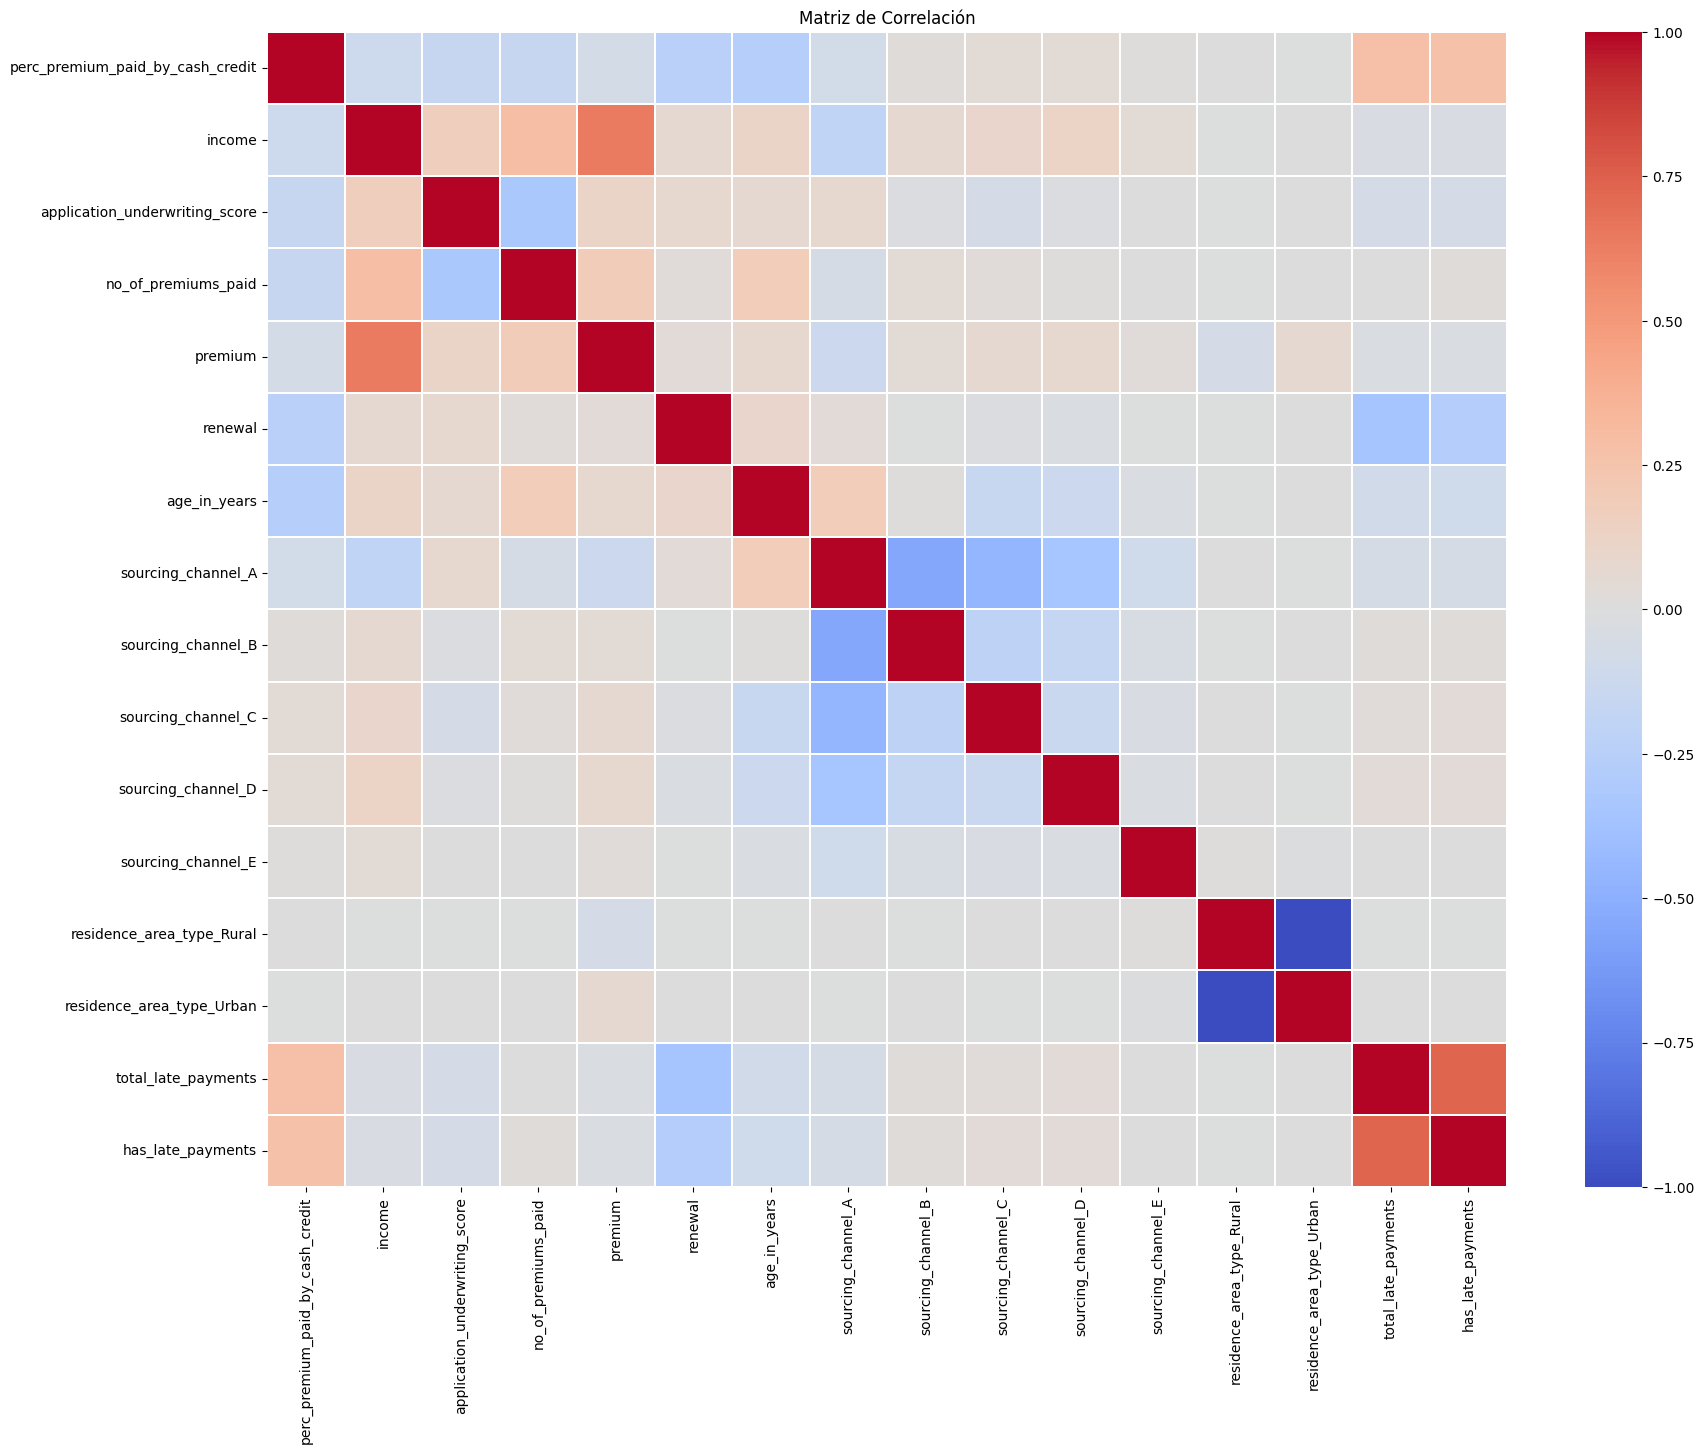

In [190]:
# matriz de correlación
corr_matrix = data_normalizado.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.2)
plt.title("Matriz de Correlación")
plt.savefig(f'images/corr_matrix.png')
plt.show()
plt.close()

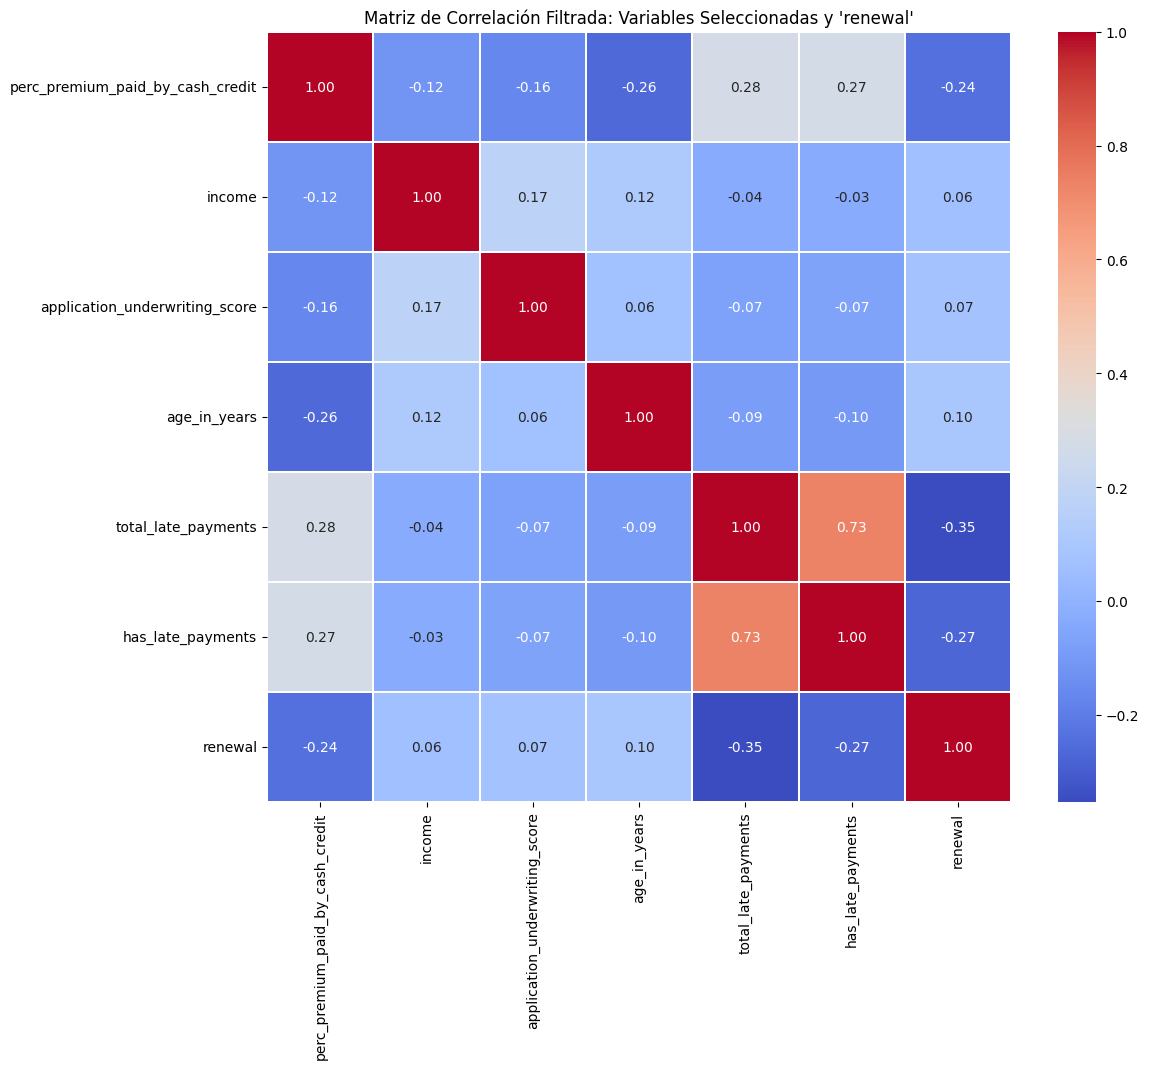

In [191]:
target = 'renewal'  # variable objetivo

threshold_pred = 0.05  # correlación con renewal
threshold_corr = 0.85  # correlación entre predictores

# encontrar predictores con baja correlación con el target
low_corr_target = set(corr_matrix.columns[abs(corr_matrix[target]) < threshold_pred])
low_corr_target.discard(target)

# encontrar predictores con alta correlación entre sí
high_corr_predictors = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold_corr and corr_matrix.columns[i] != target:
            high_corr_predictors.add(corr_matrix.columns[i])

columns_to_drop = low_corr_target.union(high_corr_predictors)  # columnas a eliminar
data_normal_filtered = data_normalizado.drop(columns=columns_to_drop, errors='ignore')  # df filtrado

# actualizar columnas para la matriz filtrada
retained_cols = [col for col in data_normal_filtered.columns if col != target]
retained_numeric_cols = [col for col in retained_cols if col in [
    'perc_premium_paid_by_cash_credit',
    'income',
    'application_underwriting_score',
    'no_of_premiums_paid',
    'premium',
    'age_in_years',
    'total_late_payments',
]]

# visualizar matriz de correlación filtrada
if retained_cols:
    corr_matrix_filtered = data_normal_filtered[retained_cols + [target]].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.2)
    plt.title("Matriz de Correlación Filtrada: Variables Seleccionadas y 'renewal'")
    plt.savefig(f'images/corr_matrix_filtered.png')
    plt.show()
    plt.close()
else:
    print("No hay variables restantes para correlación filtrada.")

In [192]:
columns_to_drop # columnas eliminadas

{'no_of_premiums_paid',
 'premium',
 'residence_area_type_Rural',
 'residence_area_type_Urban',
 'sourcing_channel_A',
 'sourcing_channel_B',
 'sourcing_channel_C',
 'sourcing_channel_D',
 'sourcing_channel_E'}

In [193]:
data_normal_filtered.columns.tolist() # columnas restantes

['perc_premium_paid_by_cash_credit',
 'income',
 'application_underwriting_score',
 'renewal',
 'age_in_years',
 'total_late_payments',
 'has_late_payments']

In [194]:
# mostrar correlaciones con renewal
print("\nCorrelaciones con renewal (ordenadas):")
print(corr_matrix[target].sort_values(ascending=False))


Correlaciones con renewal (ordenadas):
renewal                             1.000000
age_in_years                        0.095151
application_underwriting_score      0.071112
income                              0.062636
premium                             0.038247
sourcing_channel_A                  0.036386
no_of_premiums_paid                 0.025084
residence_area_type_Urban           0.001667
residence_area_type_Rural          -0.001667
sourcing_channel_B                 -0.004151
sourcing_channel_E                 -0.004685
sourcing_channel_C                 -0.021598
sourcing_channel_D                 -0.028412
perc_premium_paid_by_cash_credit   -0.240980
has_late_payments                  -0.272830
total_late_payments                -0.353315
Name: renewal, dtype: float64


In [195]:
# verificar primeras filas
data_normal_filtered.head(10)

,perc_premium_paid_by_cash_credit,income,application_underwriting_score,renewal,age_in_years,total_late_payments,has_late_payments
0,0.429,0.327166,0.584726,1,0.165517,0.000000,0
1,0.010,0.312680,1.000000,1,0.524138,0.000000,0
2,0.917,0.152245,0.427208,0,0.372414,0.315789,1
3,0.049,0.284792,0.847255,1,0.289655,0.000000,0
4,0.052,0.256630,0.990453,1,0.896552,0.000000,0
5,0.540,0.299211,0.661098,1,0.372414,0.105263,1
6,1.000,0.193744,0.599045,1,0.648276,0.000000,0
7,1.000,0.244796,0.732697,0,0.537931,0.578947,1
8,0.621,0.163779,0.852029,1,0.082759,0.000000,0
9,0.908,0.181649,0.532220,0,0.579310,0.105263,1


[Regresar a la Tabla de Contenido](#id0)

<div id = "id31" >

### **7.7 Balanceo de datos**

In [196]:
data_copy = data_normal_filtered.copy() # copiar el dataset filtrado

In [197]:
data_copy.info() # verificar tipos de datos + nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64 
 1   income                            79853 non-null  float64 
 2   application_underwriting_score    79853 non-null  float64 
 3   renewal                           79853 non-null  category
 4   age_in_years                      79853 non-null  float64 
 5   total_late_payments               79853 non-null  float64 
 6   has_late_payments                 79853 non-null  int64   
dtypes: category(1), float64(5), int64(1)
memory usage: 3.7 MB


In [198]:
# convertir target a categoría
data_copy['renewal'] = data_copy['renewal'].astype('category')


Distribución de renewal:
renewal
1    74855
0     4998
Name: count, dtype: int64


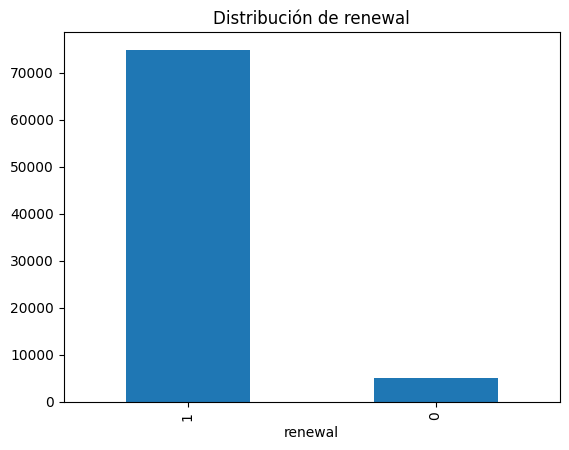

In [199]:
#distribución inicial
print("\nDistribución de renewal:")
print(data_copy['renewal'].value_counts())
data_copy['renewal'].value_counts().plot(kind='bar')
plt.title('Distribución de renewal')
plt.savefig(f'images/renewal_dist.png')
plt.show()
plt.close()

In [200]:
data_copy.columns.to_list()

['perc_premium_paid_by_cash_credit',
 'income',
 'application_underwriting_score',
 'renewal',
 'age_in_years',
 'total_late_payments',
 'has_late_payments']


Distribución de renewal después de SMOTE:
renewal
0    74855
1    74855
Name: count, dtype: int64


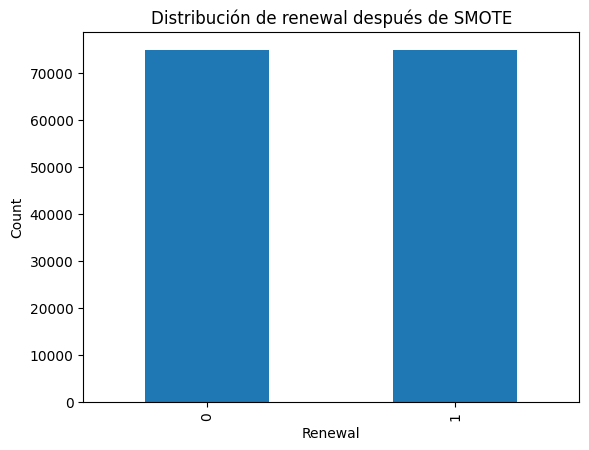

In [201]:
# separar las variables predictoras (X) y la variable objetivo (y)
X = data_copy.drop('renewal', axis=1)
y = data_copy['renewal']

# aplicar SMOTE solo a variables numéricas
numeric_cols = [
    'perc_premium_paid_by_cash_credit',
    'income',
    'application_underwriting_score',
    'age_in_years',
    'total_late_payments',
    'has_late_payments',
]
X_numeric = X[numeric_cols]
smote = SMOTE(random_state=42)
X_resampled_numeric, y_resampled = smote.fit_resample(X_numeric, y)

# asegurar que los índices se alineen correctamente
X_resampled_numeric_df = pd.DataFrame(X_resampled_numeric, columns=numeric_cols, index=range(len(y_resampled)))
X_non_numeric = X.drop(columns=numeric_cols)
X_resampled = pd.concat([X_resampled_numeric_df, X_non_numeric.reindex(X_resampled_numeric_df.index)], axis=1)

# crear df final
df_insurance = pd.DataFrame(X_resampled, columns=X.columns)
df_insurance['renewal'] = y_resampled

# verificar distribución después de SMOTE
print("\nDistribución de renewal después de SMOTE:")
print(df_insurance['renewal'].value_counts())
df_insurance['renewal'].value_counts().plot(kind='bar')
plt.title('Distribución de renewal después de SMOTE')
plt.xlabel('Renewal')
plt.ylabel('Count')
plt.savefig(f'images/renewal_smote_dist.png')
plt.show()
plt.close()

[Regresar a la Tabla de Contenido](#id0)

<div id = "id32" >

### **7.8 Selección y justificación de variables finales**

Las variables finales se seleccionan a partir del análisis de correlaciones, conservando únicamente aquellas con |corr| > 0.05 respecto a `renewal` y eliminando predictores altamente correlacionados entre sí (>|0.85|). Este proceso reduce redundancia, simplifica el modelo y fortalece la señal estadística. Las variables retenidas y su aporte al modelo son:

- `perc_premium_paid_by_cash_credit`: Correlación negativa (−0.241). Un mayor uso de efectivo/crédito refleja inestabilidad financiera y se asocia con menor probabilidad de renovación.
- `income`: Correlación positiva (0.063). Ingresos más altos indican capacidad de pago sostenida y reducen la probabilidad de churn.
- `application_underwriting_score`: Correlación positiva (0.071). Puntuaciones altas implican menor riesgo para la aseguradora y mayor propensión a renovar.
- `age_in_years`: Correlación positiva (0.095), la más alta. Clientes mayores suelen mostrar lealtad al producto y estabilidad en pagos.
- `total_late_payments`: Correlación negativa (−0.353). Es la señal más fuerte; resume el historial de atrasos y captura riesgo acumulado de manera compacta.
- `has_late_payments`: Correlación negativa (−0.273). Variable binaria útil para detección rápida de riesgo, complementando la magnitud que aporta `total_late_payments`.

Se excluyen predictores con contribución marginal (p. ej., `residence_area_type` ~0.002 o `sourcing_channel_A-E` entre ~0.02 y ~0.03) y aquellos redundantes con variables agregadas. El conjunto final equilibra señales positivas (ingreso, edad, puntaje) y negativas (mora, método de pago), proporcionando un espacio de características robusto para modelado predictivo y segmentación de clientes.

In [202]:
# dataset final para modelado
df_insurance.head(10)

,perc_premium_paid_by_cash_credit,income,application_underwriting_score,age_in_years,total_late_payments,has_late_payments,renewal
0,0.429,0.327166,0.584726,0.165517,0.000000,0,1
1,0.010,0.312680,1.000000,0.524138,0.000000,0,1
2,0.917,0.152245,0.427208,0.372414,0.315789,1,0
3,0.049,0.284792,0.847255,0.289655,0.000000,0,1
4,0.052,0.256630,0.990453,0.896552,0.000000,0,1
5,0.540,0.299211,0.661098,0.372414,0.105263,1,1
6,1.000,0.193744,0.599045,0.648276,0.000000,0,1
7,1.000,0.244796,0.732697,0.537931,0.578947,1,0
8,0.621,0.163779,0.852029,0.082759,0.000000,0,1
9,0.908,0.181649,0.532220,0.579310,0.105263,1,0


In [ ]:
# guardar dataset
df_insurance.to_csv('data/insurance_company_final.csv', index=False)

[Regresar a la Tabla de Contenido](#id0)

<div id = "id33" >

## **8. Modelado / Comparación de Algoritmos**

En esta sección se comparan tres algoritmos de clasificación binaria (*Random Forest Classifier*, *Logistic Regression* y *KNN Classifier*) para predecir la probabilidad de renovación (`renewal`). El problema es inherentemente binario (renueva = 1; no renueva = 0), por lo que se emplean modelos de clasificación en lugar de regresión continua. Estos algoritmos permiten generar probabilidades calibradas entre 0 y 1, adecuadas para priorizar clientes, asignar incentivos o segmentar riesgo.

Se utiliza el dataset balanceado (`df_insurance`), procesado con ingeniería de características, normalización mediante MinMaxScaler y SMOTE para corregir desbalance. Se realiza un split train/test 80/20 y se evalúa cada modelo con métricas de clasificación (*Accuracy*, *Precision*, *Recall*, *F1-score*) y métricas basadas en probabilidad (*Log Loss*, *Brier Score* y *ROC-AUC*).

### **Importancia de las métricas**

El objetivo es identificar clientes con **alta probabilidad de no renovar**, para asignar incentivos o estrategias de retención. Por lo tanto, las métricas más relevantes son:

- ***Recall* (clase 0 – no renovación):** evitar falsos negativos es crítico, ya que perder un cliente costoso impacta más que contactar innecesariamente a uno que sí iba a renovar.
- ***ROC-AUC*:** mide la capacidad general del modelo para distinguir entre quienes renuevan y quienes no, independiente de umbrales.
- ***F1-score*:** métrica secundaria útil en escenarios balanceados post-SMOTE donde se requiere equilibrio entre precisión y recall.

La métrica más importante para este caso es el *Recall* de la clase 0 (clientes que no renuevan), ya que el costo de no intervenir a tiempo es mayor que el costo de intervenir a un cliente que sí planeaba renovar. Por consiguiente, el modelo seleccionado será aquel que maximice el *Recall* para la clase 0, manteniendo un *ROC-AUC* competitivo y penalizaciones razonables en *log-loss*, asegurando un equilibrio entre desempeño y utilidad operativa.

### **Optimización del modelo**

Cada algoritmo se someterá a un proceso de optimización (Grid Search o ajuste manual de hiperparámetros) para comparar:

- Versiones base vs. versiones optimizadas
- Cambios en precisión, recall y ROC-AUC
- Ajustes en regularización, profundidad, número de vecinos, etc.

Esto permitirá justificar la elección final del modelo óptimo según desempeño técnico y alineación con los objetivos del negocio.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id34" >

### **8.1 Descripción General**

Esta sección presenta la preparación de los conjuntos de entrenamiento y prueba, la inspección del dataset final utilizado para modelado y la visualización básica de las variables predictoras frente a la variable objetivo (`renewal`).

[Regresar a la Tabla de Contenido](#id0)

<div id = "id35" >

#### **8.1.1 *Preparación de train/test***

Se divide `df_insurance` en train (80%) y test (20%), estratificando por `renewal` para mantener balance post-SMOTE.

In [215]:
features = [
    'perc_premium_paid_by_cash_credit',
    'income',
    'application_underwriting_score',
    'age_in_years',
    'total_late_payments',
    'has_late_payments'
]

X = df_insurance[features]
y = df_insurance['renewal'].astype(int) # de category a int

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_insurance['renewal'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119768, 6)
(29942, 6)
(119768,)
(29942,)


[Regresar a la Tabla de Contenido](#id0)

<div id = "id36" >

#### **8.1.2 *Información del dataset cargado***

In [216]:
print(df_insurance.info())
print(df_insurance.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149710 entries, 0 to 149709
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   perc_premium_paid_by_cash_credit  149710 non-null  float64 
 1   income                            149710 non-null  float64 
 2   application_underwriting_score    149710 non-null  float64 
 3   age_in_years                      149710 non-null  float64 
 4   total_late_payments               149710 non-null  float64 
 5   has_late_payments                 149710 non-null  int64   
 6   renewal                           149710 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 7.0 MB
None
       perc_premium_paid_by_cash_credit         income  \
count                     149710.000000  149710.000000   
mean                           0.460484       0.223887   
std                            0.377278       0.077133   
min  

[Regresar a la Tabla de Contenido](#id0)

<div id = "id37" >

#### **8.1.3 *Visualización de variables***

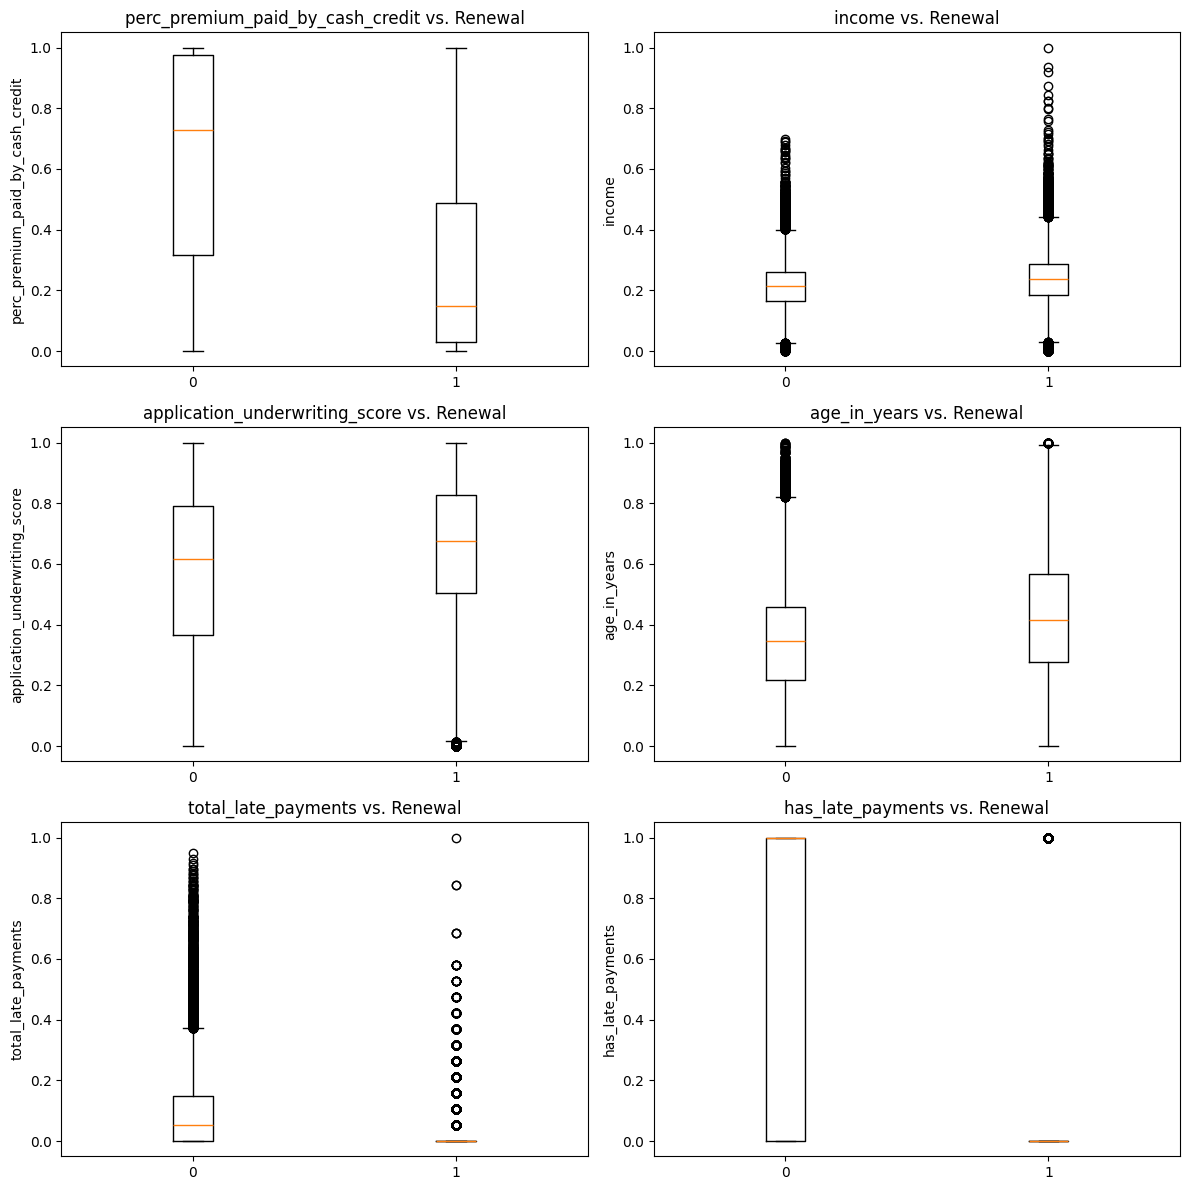

In [218]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# visualización de cada variable vs. objetivo (renewal)
for i, col in enumerate(features):
    axes[i].boxplot([
        df_insurance[df_insurance['renewal'] == 0][col],
        df_insurance[df_insurance['renewal'] == 1][col]
    ])
    axes[i].set_title(f'{col} vs. Renewal')
    axes[i].set_xticklabels(['0', '1'])
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

[Regresar a la Tabla de Contenido](#id0)